In [2]:
import pandas as pd
import numpy as np

opciones_full = pd.read_excel('opciones_infosweb.xlsx')
opciones_full.head()

Modulo   SubModulo          Accion                   Opcion  \
0  Organizacion  Estructura  Mantenimientos  Estructura Organizativa   
1  Organizacion  Estructura  Mantenimientos  Estructura Organizativa   
2  Organizacion  Estructura  Mantenimientos  Estructura Organizativa   
3  Organizacion  Estructura  Mantenimientos  Estructura Organizativa   
4  Organizacion  Estructura  Mantenimientos  Estructura Organizativa   

                           SubOpcion Estatus  Numero de Aplicacion  \
0                        Organigrama   Listo                  13.0   
1                   Centro de Costos   Listo                  13.0   
2                Niveles Jerarquicos   Listo                  13.0   
3              Unidad Administrativa   Listo                  13.0   
4  Unidad Administrativa Corporativa   Listo                  13.0   

   Numero de la Pagina Observaciones  
0                910.0           NaN  
1                 43.0           NaN  
2                909.0           NaN  
3               1030.0           NaN  
4                 52.0           NaN

<AxesSubplot:>

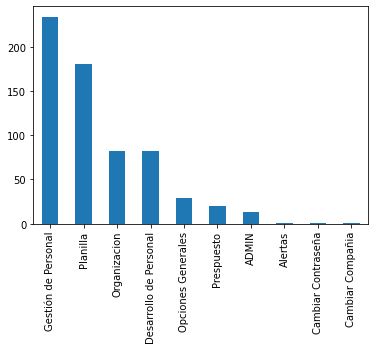

In [3]:
import matplotlib.pylab as plt
opciones_series = pd.Series(opciones_full.Modulo.value_counts())
opciones_series.plot.bar()


In [4]:
opciones_full.head(4)

Modulo   SubModulo          Accion                   Opcion  \
0  Organizacion  Estructura  Mantenimientos  Estructura Organizativa   
1  Organizacion  Estructura  Mantenimientos  Estructura Organizativa   
2  Organizacion  Estructura  Mantenimientos  Estructura Organizativa   
3  Organizacion  Estructura  Mantenimientos  Estructura Organizativa   

               SubOpcion Estatus  Numero de Aplicacion  Numero de la Pagina  \
0            Organigrama   Listo                  13.0                910.0   
1       Centro de Costos   Listo                  13.0                 43.0   
2    Niveles Jerarquicos   Listo                  13.0                909.0   
3  Unidad Administrativa   Listo                  13.0               1030.0   

  Observaciones  
0           NaN  
1           NaN  
2           NaN  
3           NaN

In [5]:
submodulos = pd.DataFrame(opciones_full['SubModulo'].unique(),columns={'Submodulo'})
submodulos.value_counts()

Submodulo                               
*                                           1
Acceso a Fases Employment                   1
Mantenimiento de Contrato                   1
Mis Preguntas de Seguridad                  1
PES Integración Equivalente                 1
Paises                                      1
Parametrización de Carga                    1
Planeación Estrategica                      1
Presupuesto                                 1
Provincias                                  1
Rep. Alfabético de Instituciones            1
Rep. Instituaciones por Tipo                1
Rep. Provincias y Distritos                 1
Rep. Sectores de Vivienda                   1
Replicar Empresa                            1
Reporte de Empleados                        1
Sectores de Vivienda                        1
Seguridad Industrial                        1
Selección de Personal                       1
TAGS de Contrato                            1
Tablas de Base de Datos para generar TA

## Generar dataframe para el módulo

In [380]:
# modulos = opciones_full[opciones_full['Modulo'].isin(['modulos'])]
# modulos = opciones_full[opciones_full['SubModulo'].isin(['Estructura'])]
modulos = opciones_full[opciones_full['Estatus'].isin(['Listo'])]
modulos = modulos.reset_index(drop=True)
modulos

Modulo             SubModulo              Accion  \
0    Organizacion            Estructura      Mantenimientos   
1    Organizacion            Estructura      Mantenimientos   
2    Organizacion            Estructura      Mantenimientos   
3    Organizacion            Estructura      Mantenimientos   
4    Organizacion            Estructura      Mantenimientos   
..            ...                   ...                 ...   
600         ADMIN        Administración  Administracion PES   
601         ADMIN        Administracion  Control de CAPTCHA   
602         ADMIN    Cambiar Contraseña                 NaN   
603         ADMIN  Reporte de Empleados                 NaN   
604         ADMIN      Cambiar Compañia                 NaN   

                      Opcion                          SubOpcion Estatus  \
0    Estructura Organizativa                        Organigrama   Listo   
1    Estructura Organizativa                   Centro de Costos   Listo   
2    Estructura Organizativa                Niveles Jerarquicos   Listo   
3    Estructura Organizativa              Unidad Administrativa   Listo   
4    Estructura Organizativa  Unidad Administrativa Corporativa   Listo   
..                       ...                                ...     ...   
600                      NaN                                NaN   Listo   
601                      NaN                                NaN   Listo   
602                      NaN                                NaN   Listo   
603                      NaN                                NaN   Listo   
604                      NaN                                NaN   Listo   

     Numero de Aplicacion  Numero de la Pagina  \
0                    13.0                910.0   
1                    13.0                 43.0   
2                    13.0                909.0   
3                    13.0               1030.0   
4                    13.0                 52.0   
..                    ...                  ...   
600                  12.0                 39.0   
601                  12.0                 54.0   
602                  10.0                 12.0   
603                  12.0                 32.0   
604                  10.0                  1.0   

                           Observaciones  
0                                    NaN  
1                                    NaN  
2                                    NaN  
3                                    NaN  
4                                    NaN  
..                                   ...  
600  Se debe entrar con el usuario:ADMIN  
601                                  NaN  
602  Se debe entrar con el usuario:ADMIN  
603  Se debe entrar con el usuario:ADMIN  
604  Se debe entrar con el usuario:ADMIN  

[605 rows x 9 columns]

> excluye aqueyos que no tengan ni accion, ni opcion ni subopcion

In [381]:
# Create a boolean mask to filter rows
mask = ~(modulos['Accion'].isnull() & modulos['Opcion'].isnull() & modulos['SubOpcion'].isnull())

# Apply the mask to filter the DataFrame
modulos_filtered = modulos[mask]
modulos_filtered

Modulo       SubModulo                    Accion  \
0    Organizacion      Estructura            Mantenimientos   
1    Organizacion      Estructura            Mantenimientos   
2    Organizacion      Estructura            Mantenimientos   
3    Organizacion      Estructura            Mantenimientos   
4    Organizacion      Estructura            Mantenimientos   
..            ...             ...                       ...   
597         ADMIN  Administracion  Usuarios de Autoservicio   
598         ADMIN  Administración   Mantenimiento de Acceso   
599         ADMIN  Administración    Preguntas de Seguridad   
600         ADMIN  Administración        Administracion PES   
601         ADMIN  Administracion        Control de CAPTCHA   

                      Opcion                          SubOpcion Estatus  \
0    Estructura Organizativa                        Organigrama   Listo   
1    Estructura Organizativa                   Centro de Costos   Listo   
2    Estructura Organizativa                Niveles Jerarquicos   Listo   
3    Estructura Organizativa              Unidad Administrativa   Listo   
4    Estructura Organizativa  Unidad Administrativa Corporativa   Listo   
..                       ...                                ...     ...   
597                      NaN                                NaN   Listo   
598                      NaN                                NaN   Listo   
599                      NaN                                NaN   Listo   
600                      NaN                                NaN   Listo   
601                      NaN                                NaN   Listo   

     Numero de Aplicacion  Numero de la Pagina  \
0                    13.0                910.0   
1                    13.0                 43.0   
2                    13.0                909.0   
3                    13.0               1030.0   
4                    13.0                 52.0   
..                    ...                  ...   
597                  12.0                 38.0   
598                  12.0                 52.0   
599                  12.0                 53.0   
600                  12.0                 39.0   
601                  12.0                 54.0   

                           Observaciones  
0                                    NaN  
1                                    NaN  
2                                    NaN  
3                                    NaN  
4                                    NaN  
..                                   ...  
597  Se debe entrar con el usuario:ADMIN  
598  Se debe entrar con el usuario:ADMIN  
599  Se debe entrar con el usuario:ADMIN  
600  Se debe entrar con el usuario:ADMIN  
601                                  NaN  

[570 rows x 9 columns]

In [382]:
submodulos = pd.DataFrame(modulos['SubModulo'].unique(), columns={'Submodulo'})
submodulos

Submodulo
0                                 Estructura
1                       Acciones de Personal
2                                 Expediente
3                      Selección de Personal
4                                Presupuesto
5                                 Beneficios
6                       Seguridad Industrial
7                  Capacitación y Desarrollo
8                    Evaluación de Desempeño
9                  Administración de Tiempos
10                Administración de Salarios
11                                   Alertas
12                Mis Preguntas de Seguridad
13                                  Empresas
14                           Tipos de Gastos
15                          Replicar Empresa
16                            Carga de Datos
17                  Parametrización de Carga
18                        Carga Automatizada
19                                    Paises
20                                   Idiomas
21                      Sectores de Vivienda
22                 Mantenimiento de Contrato
23                                Provincias
24                       Tipos de Documentos
25                   Tipos de Instituaciones
26                             Instituciones
27                            Discapacidades
28               Rep. Provincias y Distritos
29                       Equipo de Seguridad
30                              Enfermedades
31              Rep. Instituaciones por Tipo
32          Rep. Alfabético de Instituciones
33                 Rep. Sectores de Vivienda
34                          TAGS de Contrato
35  Tablas de Base de Datos para generar TAB
36                           Log de Procesos
37                 Acceso a Fases Employment
38               PES Integración Equivalente
39                Actualizar fotos empleados
40                        Cambiar Contraseña
41                          Cambiar Compañia
42                            Administracion
43                            Administración
44                      Reporte de Empleados

In [367]:
print(modulos['SubOpcion'].describe())
print(modulos['Opcion'].describe())
print(modulos['Accion'].describe())

count            313
unique           305
top       Vacaciones
freq               3
Name: SubOpcion, dtype: object
count          561
unique         295
top       Planilla
freq            32
Name: Opcion, dtype: object
count          570
unique          15
top       Procesos
freq           173
Name: Accion, dtype: object


In [368]:
modulos['Accion'].value_counts()

Procesos                    173
Reportes                    156
Consultas                   103
Matenimiento                 81
Mantenimientos               29
Mantenimiento                19
Editar Registro               1
Grupos Menu                   1
Roles                         1
Usuarios                      1
Usuarios de Autoservicio      1
Mantenimiento de Acceso       1
Preguntas de Seguridad        1
Administracion PES            1
Control de CAPTCHA            1
Name: Accion, dtype: int64

>Corrección ortográfica para las Acciones

In [383]:

modulos['Accion'].replace(to_replace=['Mantenimientos','Matenimiento'],value='Mantenimiento', inplace=True)
modulos['Accion']

Procesos                    173
Reportes                    156
Mantenimiento               129
Consultas                   103
Editar Registro               1
Grupos Menu                   1
Roles                         1
Usuarios                      1
Usuarios de Autoservicio      1
Mantenimiento de Acceso       1
Preguntas de Seguridad        1
Administracion PES            1
Control de CAPTCHA            1
Name: Accion, dtype: int64

## Juntar Acción, Opción y Subopción bajo una misma columna
> Asignarles una categoría en una columna aparte de categoría
> Crear un id único

In [10]:
modulos.head()

Modulo   SubModulo         Accion                   Opcion  \
0  Organizacion  Estructura  Mantenimiento  Estructura Organizativa   
1  Organizacion  Estructura  Mantenimiento  Estructura Organizativa   
2  Organizacion  Estructura  Mantenimiento  Estructura Organizativa   
3  Organizacion  Estructura  Mantenimiento  Estructura Organizativa   
4  Organizacion  Estructura  Mantenimiento  Estructura Organizativa   

                           SubOpcion Estatus  Numero de Aplicacion  \
0                        Organigrama   Listo                  13.0   
1                   Centro de Costos   Listo                  13.0   
2                Niveles Jerarquicos   Listo                  13.0   
3              Unidad Administrativa   Listo                  13.0   
4  Unidad Administrativa Corporativa   Listo                  13.0   

   Numero de la Pagina Observaciones  
0                910.0           NaN  
1                 43.0           NaN  
2                909.0           NaN  
3               1030.0           NaN  
4                 52.0           NaN

In [175]:
submodulos.head()

Submodulo
0             Estructura
1   Acciones de Personal
2             Expediente
3  Selección de Personal
4            Presupuesto

>*** Prueba de iteración para un submodulo específico

In [11]:
for p in submodulos.itertuples(index=False):
    print(p.Submodulo)

Estructura
Acciones de Personal
Expediente
Selección de Personal
Presupuesto
Beneficios
Seguridad Industrial
Capacitación y Desarrollo
Evaluación de Desempeño
Administración de Tiempos
Administración de Salarios
Alertas
Mis Preguntas de Seguridad
Empresas
Tipos de Gastos
Replicar Empresa
Carga de Datos
Parametrización de Carga
Carga Automatizada
Paises
Idiomas
Sectores de Vivienda
Mantenimiento de Contrato
Provincias
Tipos de Documentos
Tipos de Instituaciones
Instituciones
Discapacidades
Rep. Provincias y Distritos
Equipo de Seguridad
Enfermedades
Rep. Instituaciones por Tipo
Rep. Alfabético de Instituciones
Rep. Sectores de Vivienda
TAGS de Contrato
Tablas de Base de Datos para generar TAB
Log de Procesos
Acceso a Fases Employment
PES Integración Equivalente
Actualizar fotos empleados
Cambiar Contraseña
Cambiar Compañia
Administracion
Administración
Reporte de Empleados


In [35]:
submodulos_list = []
# submodulos.squeeze('columns')
for p in submodulos['Submodulo']:
    # print(p)
    if (p == 'Estructura'):
        modulo_actual_df = modulos[modulos['SubModulo'] == p]

        # Crear dataframe que mantiene acciones, opciones y subopciones
        accion_lista = []
        opcion_lista = []
        subopcion_lista = []
        for row in modulo_actual_df.itertuples(index=False):
            accion_lista.append(row.Accion)
            opcion_lista.append(row.Opcion)
            subopcion_lista.append(row.SubOpcion)
        
        # Crear series para formar dataframes de las opciones para el módulo
        accion_lista = pd.Series(accion_lista).unique()
        opcion_lista = pd.Series(opcion_lista).dropna().unique()
        subopcion_lista = pd.Series(subopcion_lista).dropna().unique()

        """
            Crear dataframe con todas las opciones disponibles para
            el submódulo que es está evaluando.
        """
        modulo_acciones_df = pd.DataFrame({
                'Modulo' : p,
                'Opcion' : accion_lista,
                'Categoria' : 'Accion'
            })

        modulo_opciones_df = pd.DataFrame({#'id_padre' : organizacion_df.index + 1,
                    'Modulo': p,
                    'Opcion': opcion_lista,
                    'Categoria': 'Opcion'})
            
        modulo_SubOpciones_df = pd.DataFrame({#'id_padre' : organizacion_df.index + 1,
                    'Modulo': p,
                    'Opcion': subopcion_lista,
                    'Categoria': 'Subopcion'})
            
        modulo_estructura_menu_lateral_init_df = pd.concat([modulo_acciones_df,modulo_opciones_df,modulo_SubOpciones_df])
        modulo_estructura_menu_lateral_init_df.reset_index(inplace=True,drop=True)
        modulo_estructura_menu_lateral_init_df['id_unico'] = modulo_estructura_menu_lateral_init_df.index + 1
        app_id = int(modulo_actual_df['Numero de Aplicacion'].unique())
        modulo_estructura_menu_lateral_init_df['app_id'] = app_id
        # modulo_estructura_menu_lateral_init_df.to_excel('modulo_estructura_menu_lateral_init_df.xlsx')

            
            

modulo_actual_df.reset_index(inplace=True, drop=True)
modulo_actual_df.head(3)
modulo_estructura_menu_lateral_init_df


Modulo                                    Opcion  Categoria  id_unico  \
0   Estructura                             Mantenimiento     Accion         1   
1   Estructura                                 Consultas     Accion         2   
2   Estructura                                  Procesos     Accion         3   
3   Estructura                                  Reportes     Accion         4   
4   Estructura                   Estructura Organizativa     Opcion         5   
5   Estructura                         Perfiles y Cargos     Opcion         6   
6   Estructura                              Presupuestos     Opcion         7   
7   Estructura           Diagrama Estructura Jeraárquica     Opcion         8   
8   Estructura                            Rotación Anual     Opcion         9   
9   Estructura                    Consulta de Estructura     Opcion        10   
10  Estructura                   Puesto x Tipo de Puesto     Opcion        11   
11  Estructura                             Departamentos     Opcion        12   
12  Estructura                         Clases Salariales     Opcion        13   
13  Estructura                                 Funciones     Opcion        14   
14  Estructura                                Requisitos     Opcion        15   
15  Estructura                      Funciones por Puesto     Opcion        16   
16  Estructura  Posiciones Vacantes/Ocupadas/ Suprimidas     Opcion        17   
17  Estructura                    Supervisores asignados     Opcion        18   
18  Estructura                   Supresion de Posiciónes     Opcion        19   
19  Estructura            Supresión Puestos y Posiciones     Opcion        20   
20  Estructura     Distribución de Costos por Porcentaje     Opcion        21   
21  Estructura             Cargar estructura de personal     Opcion        22   
22  Estructura                Catálogo por Departamentos     Opcion        23   
23  Estructura                     Descripcion de Puesto     Opcion        24   
24  Estructura                       Requisitos X Puesto     Opcion        25   
25  Estructura        Inventario de Puestos y Posiciones     Opcion        26   
26  Estructura               Posiciones por departamento     Opcion        27   
27  Estructura                         Reporte de Ahorro     Opcion        28   
28  Estructura             Carga  Estructura de Personal     Opcion        29   
29  Estructura                               Organigrama  Subopcion        30   
30  Estructura                          Centro de Costos  Subopcion        31   
31  Estructura                       Niveles Jerarquicos  Subopcion        32   
32  Estructura                     Unidad Administrativa  Subopcion        33   
33  Estructura         Unidad Administrativa Corporativa  Subopcion        34   
34  Estructura          Niveles Jerarquicos Corporativos  Subopcion        35   
35  Estructura             Organigrama Corporativo-Staff  Subopcion        36   
36  Estructura      Organigrama Corporativo-Responsables  Subopcion        37   
37  Estructura         Organigrama Corporativo-Headcount  Subopcion        38   
38  Estructura                   Frecuencia de Funciones  Subopcion        39   
39  Estructura                                 Funciones  Subopcion        40   
40  Estructura                     Areas de Competencias  Subopcion        41   
41  Estructura                Banco de datos de Perfiles  Subopcion        42   
42  Estructura                          Tipos de Puestos  Subopcion        43   
43  Estructura                         Clases Salariales  Subopcion        44   
44  Estructura                                   Puestos  Subopcion        45   
45  Estructura                      Presupuesto x Puesto  Subopcion        46   
46  Estructura                                Posiciones  Subopcion        47   
47  Estructura                    Supervisores de Tiempo  Subopcion        48   
48  Estructura              Supervisore

In [39]:
print('cantidad páginas por categoria')
modulo_estructura_menu_lateral_init_df['Categoria'].value_counts()

cantidad páginas por categoria


Subopcion    29
Opcion       25
Accion        4
Name: Categoria, dtype: int64

## Proceso con busqueda de página para agregar al dataset

In [40]:
modulo_actual_df.head(3)

Modulo   SubModulo         Accion                   Opcion  \
0  Organizacion  Estructura  Mantenimiento  Estructura Organizativa   
1  Organizacion  Estructura  Mantenimiento  Estructura Organizativa   
2  Organizacion  Estructura  Mantenimiento  Estructura Organizativa   

             SubOpcion Estatus  Numero de Aplicacion  Numero de la Pagina  \
0          Organigrama   Listo                  13.0                910.0   
1     Centro de Costos   Listo                  13.0                 43.0   
2  Niveles Jerarquicos   Listo                  13.0                909.0   

  Observaciones  
0           NaN  
1           NaN  
2           NaN

In [41]:
subopciones_pages = pd.merge(modulo_estructura_menu_lateral_init_df[modulo_estructura_menu_lateral_init_df['Categoria'] == 'Subopcion'], modulo_actual_df[['SubOpcion', 'Numero de la Pagina']], left_on='Opcion', right_on='SubOpcion', how='left')
subopciones_pages.rename(columns={'Numero de la Pagina': 'page_id'}, inplace=True)
# Drop the redundant 'Subopcion' column
subopciones_pages.drop(columns='SubOpcion', inplace=True)
# subopciones_pages.to_excel('test1.xlsx')
subopciones_pages

Modulo                                Opcion  Categoria  id_unico  \
0   Estructura                           Organigrama  Subopcion        30   
1   Estructura                      Centro de Costos  Subopcion        31   
2   Estructura                   Niveles Jerarquicos  Subopcion        32   
3   Estructura                 Unidad Administrativa  Subopcion        33   
4   Estructura     Unidad Administrativa Corporativa  Subopcion        34   
5   Estructura      Niveles Jerarquicos Corporativos  Subopcion        35   
6   Estructura         Organigrama Corporativo-Staff  Subopcion        36   
7   Estructura  Organigrama Corporativo-Responsables  Subopcion        37   
8   Estructura     Organigrama Corporativo-Headcount  Subopcion        38   
9   Estructura               Frecuencia de Funciones  Subopcion        39   
10  Estructura                             Funciones  Subopcion        40   
11  Estructura                 Areas de Competencias  Subopcion        41   
12  Estructura            Banco de datos de Perfiles  Subopcion        42   
13  Estructura                      Tipos de Puestos  Subopcion        43   
14  Estructura                     Clases Salariales  Subopcion        44   
15  Estructura                               Puestos  Subopcion        45   
16  Estructura                  Presupuesto x Puesto  Subopcion        46   
17  Estructura                            Posiciones  Subopcion        47   
18  Estructura                Supervisores de Tiempo  Subopcion        48   
19  Estructura          Supervisores de Autoservicio  Subopcion        49   
20  Estructura                     Grado por Puestos  Subopcion        50   
21  Estructura                  Grados por Categoria  Subopcion        51   
22  Estructura                                 Temas  Subopcion        52   
23  Estructura                 Capacitación Asociada  Subopcion        53   
24  Estructura                  Areas de Presupuesto  Subopcion        54   
25  Estructura              Fuente de Financiamiento  Subopcion        55   
26  Estructura                     Objetos de Gastos  Subopcion        56   
27  Estructura                      Tipo Presupuesto  Subopcion        57   
28  Estructura                Partida Presupuestaria  Subopcion        58   

    app_id  page_id  
0       13    910.0  
1       13     43.0  
2       13    909.0  
3       13   1030.0  
4       13     52.0  
5       13     57.0  
6       13     58.0  
7       13     61.0  
8       13     59.0  
9       13      9.0  
10      13      4.0  
11      13     17.0  
12      13     11.0  
13      13    311.0  
14      13     26.0  
15      13    700.0  
16      13    245.0  
17      13    240.0  
18      13    266.0  
19      13   1020.0  
20      13   1010.0  
21      13   1011.0  
22      13    114.0  
23      13    112.0  
24      13     30.0  
25      13     32.0  
26      13     34.0  
27      13     39.0  
28      13     45.0

In [63]:
submodulos_list = []
# submodulos.squeeze('columns')
for p in submodulos['Submodulo']:
    # print(p)
    if (p == 'Estructura'):
        modulo_actual_df = modulos[modulos['SubModulo'] == p]

        # Crear dataframe que mantiene acciones, opciones y subopciones
        accion_lista = []
        opcion_lista = []
        subopcion_lista = []
        for row in modulo_actual_df.itertuples(index=False):
            accion_lista.append(row.Accion)
            opcion_lista.append(row.Opcion)
            subopcion_lista.append(row.SubOpcion)
        
        # Crear series para formar dataframes de las opciones para el módulo
        accion_lista = pd.Series(accion_lista).unique()
        opcion_lista = pd.Series(opcion_lista).dropna().unique()
        subopcion_lista = pd.Series(subopcion_lista).dropna().unique()

        """
            Crear dataframe con todas las opciones disponibles para
            el submódulo que es está evaluando.
        """
        modulo_acciones_df = pd.DataFrame({
                'SubModulo' : p,
                'Opcion' : accion_lista,
                'Categoria' : 'Accion'
            })

        modulo_opciones_df = pd.DataFrame({#'id_padre' : organizacion_df.index + 1,
                    'SubModulo': p,
                    'Opcion': opcion_lista,
                    'Categoria': 'Opcion'})
            
        modulo_SubOpciones_df = pd.DataFrame({#'id_padre' : organizacion_df.index + 1,
                    'SubModulo': p,
                    'Opcion': subopcion_lista,
                    'Categoria': 'Subopcion'})
            
        modulo_menu_lateral_init_df = pd.concat([modulo_acciones_df,modulo_opciones_df,modulo_SubOpciones_df])
        modulo_menu_lateral_init_df.reset_index(inplace=True,drop=True)
        modulo_menu_lateral_init_df['id_unico'] = modulo_menu_lateral_init_df.index + 1
        app_id = int(modulo_actual_df['Numero de Aplicacion'].unique())
        modulo_menu_lateral_init_df['app_id'] = app_id
        # modulo_menu_lateral_init_df.to_excel('modulo_menu_lateral_init_df.xlsx')


        """
            Routing de las páginas para la categoría Subopción
        """
        subopciones_pages = pd.merge(modulo_menu_lateral_init_df[modulo_menu_lateral_init_df['Categoria'] == 'Subopcion'], modulo_actual_df[['SubOpcion', 'Numero de la Pagina']], left_on='Opcion', right_on='SubOpcion', how='left')
        subopciones_pages.rename(columns={'Numero de la Pagina': 'page_id'}, inplace=True)
        # Drop the redundant 'Subopcion' column
        subopciones_pages.drop(columns='SubOpcion', inplace=True)
        # subopciones_pages.to_excel('subopciones_pages.xlsx')

        """
            Routing de las páginas para la categoría Opción SIN Hijos
        """
        opciones_sinhijos = modulo_actual_df[modulo_actual_df['SubOpcion'].isnull()]
        opciones_sinhijos.reset_index(inplace=True,drop=True)
        # opciones_sinhijos
        opciones_sinhijos_pages = pd.merge(modulo_menu_lateral_init_df[modulo_menu_lateral_init_df['Categoria'] == 'Opcion'], opciones_sinhijos[['Opcion', 'Numero de la Pagina']], left_on='Opcion', right_on='Opcion', how='left')
        opciones_sinhijos_pages.rename(columns={'Numero de la Pagina': 'page_id'}, inplace=True)
        opciones_sinhijos_pages

        """
            Routing de las páginas para la categoría Accion
        """
        # Acciones Generales : Mantenimiento, reportes, etc
        acciones_pages = modulo_menu_lateral_init_df[modulo_menu_lateral_init_df['Categoria']=='Accion']


        """
            Armar dataframe de todas las páginas con id de padre
        """
        modulo_menu_lateral_pages_df = pd.concat([acciones_pages,opciones_sinhijos_pages, subopciones_pages])
        modulo_menu_lateral_pages_df.reset_index(inplace=True, drop=True)
        filename = 'menu_lateral_'+modulo_menu_lateral_pages_df['SubModulo'].unique()[0]+'.xlsx'
        modulo_menu_lateral_pages_df.to_excel('./menu_modulos/'+filename)

            
            

modulo_actual_df.reset_index(inplace=True, drop=True)
modulo_actual_df.head(3)
# modulo_menu_lateral_init_df
# subopciones_pages
# opciones_sinhijos_pages
modulo_menu_lateral_pages_df.to_excel('modulo_menu_lateral_pages_df.xlsx')
print(filename)
modulo_menu_lateral_pages_df



menu_lateral_Estructura.xlsx


SubModulo                                    Opcion  Categoria  id_unico  \
0   Estructura                             Mantenimiento     Accion         1   
1   Estructura                                 Consultas     Accion         2   
2   Estructura                                  Procesos     Accion         3   
3   Estructura                                  Reportes     Accion         4   
4   Estructura                   Estructura Organizativa     Opcion         5   
5   Estructura                         Perfiles y Cargos     Opcion         6   
6   Estructura                              Presupuestos     Opcion         7   
7   Estructura           Diagrama Estructura Jeraárquica     Opcion         8   
8   Estructura                            Rotación Anual     Opcion         9   
9   Estructura                    Consulta de Estructura     Opcion        10   
10  Estructura                   Puesto x Tipo de Puesto     Opcion        11   
11  Estructura                             Departamentos     Opcion        12   
12  Estructura                         Clases Salariales     Opcion        13   
13  Estructura                                 Funciones     Opcion        14   
14  Estructura                                Requisitos     Opcion        15   
15  Estructura                      Funciones por Puesto     Opcion        16   
16  Estructura  Posiciones Vacantes/Ocupadas/ Suprimidas     Opcion        17   
17  Estructura                    Supervisores asignados     Opcion        18   
18  Estructura                   Supresion de Posiciónes     Opcion        19   
19  Estructura            Supresión Puestos y Posiciones     Opcion        20   
20  Estructura     Distribución de Costos por Porcentaje     Opcion        21   
21  Estructura             Cargar estructura de personal     Opcion        22   
22  Estructura                Catálogo por Departamentos     Opcion        23   
23  Estructura                     Descripcion de Puesto     Opcion        24   
24  Estructura                       Requisitos X Puesto     Opcion        25   
25  Estructura        Inventario de Puestos y Posiciones     Opcion        26   
26  Estructura               Posiciones por departamento     Opcion        27   
27  Estructura                         Reporte de Ahorro     Opcion        28   
28  Estructura             Carga  Estructura de Personal     Opcion        29   
29  Estructura                               Organigrama  Subopcion        30   
30  Estructura                          Centro de Costos  Subopcion        31   
31  Estructura                       Niveles Jerarquicos  Subopcion        32   
32  Estructura                     Unidad Administrativa  Subopcion        33   
33  Estructura         Unidad Administrativa Corporativa  Subopcion        34   
34  Estructura          Niveles Jerarquicos Corporativos  Subopcion        35   
35  Estructura             Organigrama Corporativo-Staff  Subopcion        36   
36  Estructura      Organigrama Corporativo-Responsables  Subopcion        37   
37  Estructura         Organigrama Corporativo-Headcount  Subopcion        38   
38  Estructura                   Frecuencia de Funciones  Subopcion        39   
39  Estructura                                 Funciones  Subopcion        40   
40  Estructura                     Areas de Competencias  Subopcion        41   
41  Estructura                Banco de datos de Perfiles  Subopcion        42   
42  Estructura                          Tipos de Puestos  Subopcion        43   
43  Estructura                         Clases Salariales  Subopcion        44   
44  Estructura                                   Puestos  Subopcion        45   
45  Estructura                      Presupuesto x Puesto  Subopcion        46   
46  Estructura                                Posiciones  Subopcion        47   
47  Estructura                    Supervisores de Tiempo  Subopcion        48   
48  Estructura              Supervis

### Ejemplo de iteracion en DF y append a listas

In [20]:
acciones = []
opcionces = []
subopciones = []
for x in modulo_actual_df.itertuples(index=False):
    acciones.append(x.Accion)
    opcionces.append(x.Opcion)
    subopciones.append(x.SubOpcion)

acciones_series = pd.Series(acciones)
acciones_series.unique()

array(['Mantenimiento', 'Consultas', 'Procesos', 'Reportes'], dtype=object)

## Smart Data Engine : Try 1 --> Iterate over every available module

In [62]:
submodulos_list = []
# submodulos.squeeze('columns')
for p in submodulos['Submodulo']:
    # print(p)
    #if (p == 'Estructura'):
    modulo_actual_df = modulos[modulos['SubModulo'] == p]

    # Crear dataframe que mantiene acciones, opciones y subopciones
    accion_lista = []
    opcion_lista = []
    subopcion_lista = []
    for row in modulo_actual_df.itertuples(index=False):
        accion_lista.append(row.Accion)
        opcion_lista.append(row.Opcion)
        subopcion_lista.append(row.SubOpcion)
    
    # Crear series para formar dataframes de las opciones para el módulo
    accion_lista = pd.Series(accion_lista).unique()
    opcion_lista = pd.Series(opcion_lista).dropna().unique()
    subopcion_lista = pd.Series(subopcion_lista).dropna().unique()

    """
        Crear dataframe con todas las opciones disponibles para
        el submódulo que es está evaluando.
    """
    modulo_acciones_df = pd.DataFrame({
            'SubModulo' : p,
            'Opcion' : accion_lista,
            'Categoria' : 'Accion'
        })

    modulo_opciones_df = pd.DataFrame({#'id_padre' : organizacion_df.index + 1,
                'SubModulo': p,
                'Opcion': opcion_lista,
                'Categoria': 'Opcion'})
        
    modulo_SubOpciones_df = pd.DataFrame({#'id_padre' : organizacion_df.index + 1,
                'SubModulo': p,
                'Opcion': subopcion_lista,
                'Categoria': 'Subopcion'})
        
    modulo_menu_lateral_init_df = pd.concat([modulo_acciones_df,modulo_opciones_df,modulo_SubOpciones_df])
    modulo_menu_lateral_init_df.reset_index(inplace=True,drop=True)
    modulo_menu_lateral_init_df['id_unico'] = modulo_menu_lateral_init_df.index + 1
    app_id = int(modulo_actual_df['Numero de Aplicacion'].unique()[0])
    modulo_menu_lateral_init_df['app_id'] = app_id
    # modulo_menu_lateral_init_df.to_excel('modulo_menu_lateral_init_df.xlsx')


    """
        Routing de las páginas para la categoría Subopción
    """
    subopciones_pages = pd.merge(modulo_menu_lateral_init_df[modulo_menu_lateral_init_df['Categoria'] == 'Subopcion'], modulo_actual_df[['SubOpcion', 'Numero de la Pagina']], left_on='Opcion', right_on='SubOpcion', how='left')
    subopciones_pages.rename(columns={'Numero de la Pagina': 'page_id'}, inplace=True)
    # Drop the redundant 'Subopcion' column
    subopciones_pages.drop(columns='SubOpcion', inplace=True)
    # subopciones_pages.to_excel('subopciones_pages.xlsx')

    """
        Routing de las páginas para la categoría Opción SIN Hijos
    """
    opciones_sinhijos = modulo_actual_df[modulo_actual_df['SubOpcion'].isnull()]
    opciones_sinhijos.reset_index(inplace=True,drop=True)
    # opciones_sinhijos
    opciones_sinhijos_pages = pd.merge(modulo_menu_lateral_init_df[modulo_menu_lateral_init_df['Categoria'] == 'Opcion'], opciones_sinhijos[['Opcion', 'Numero de la Pagina']], left_on='Opcion', right_on='Opcion', how='left')
    opciones_sinhijos_pages.rename(columns={'Numero de la Pagina': 'page_id'}, inplace=True)
    opciones_sinhijos_pages

    """
        Routing de las páginas para la categoría Accion
    """
    # Acciones Generales : Mantenimiento, reportes, etc
    acciones_pages = modulo_menu_lateral_init_df[modulo_menu_lateral_init_df['Categoria']=='Accion']


    """
        Armar dataframe de todas las páginas con id de padre
    """
    modulo_menu_lateral_pages_df = pd.concat([acciones_pages,opciones_sinhijos_pages, subopciones_pages])
    modulo_menu_lateral_pages_df.reset_index(inplace=True, drop=True)
    filename = 'menu_lateral_'+modulo_menu_lateral_pages_df['SubModulo'].unique()[0]+'.xlsx'
    print(filename)
    modulo_menu_lateral_pages_df.to_excel('./menu_modulos/'+filename)

            
            

modulo_actual_df.reset_index(inplace=True, drop=True)
modulo_actual_df.head(3)
# modulo_menu_lateral_init_df
# subopciones_pages
# opciones_sinhijos_pages
# modulo_menu_lateral_pages_df.to_excel('modulo_menu_lateral_pages_df.xlsx')
# modulo_menu_lateral_pages_df



menu_lateral_Reporte de Empleados.xlsx


## Smart Data Engine : Try 2 --> One single file output
> This code will create a single dataframe that holds every option for every module on infosweb, with its correspondent app_id and unique id

In [173]:
submodulos_list = []
modulo_menu_lateral_list = []
# submodulos.squeeze('columns')
for p in submodulos['Submodulo']:
    # print(p)
    #if (p == 'Estructura'):
    modulo_actual_df = modulos[modulos['SubModulo'] == p]

    # Crear dataframe que mantiene acciones, opciones y subopciones
    accion_lista = []
    opcion_lista = []
    subopcion_lista = []
    for row in modulo_actual_df.itertuples(index=False):
        accion_lista.append(row.Accion)
        opcion_lista.append(row.Opcion)
        subopcion_lista.append(row.SubOpcion)
    
    # Crear series para formar dataframes de las opciones para el módulo
    accion_lista = pd.Series(accion_lista).unique()
    opcion_lista = pd.Series(opcion_lista).dropna().unique()
    subopcion_lista = pd.Series(subopcion_lista).dropna().unique()

    """
        Crear dataframe con todas las opciones disponibles para
        el submódulo que es está evaluando.
    """
    modulo_acciones_df = pd.DataFrame({
            'SubModulo' : p,
            'Opcion' : accion_lista,
            'Categoria' : 'Accion'
        })

    modulo_opciones_df = pd.DataFrame({#'id_padre' : organizacion_df.index + 1,
                'SubModulo': p,
                'Opcion': opcion_lista,
                'Categoria': 'Opcion'})
        
    modulo_SubOpciones_df = pd.DataFrame({#'id_padre' : organizacion_df.index + 1,
                'SubModulo': p,
                'Opcion': subopcion_lista,
                'Categoria': 'Subopcion'})
        
    modulo_menu_lateral_init_df = pd.concat([modulo_acciones_df,modulo_opciones_df,modulo_SubOpciones_df])
    modulo_menu_lateral_init_df.reset_index(inplace=True,drop=True)
    app_id = int(modulo_actual_df['Numero de Aplicacion'].unique()[0])
    modulo_menu_lateral_init_df['app_id'] = app_id
    for index, row in modulo_menu_lateral_init_df.iterrows():

        modulo_menu_lateral_list.append(row.values.tolist())
    # modulo_menu_lateral_init_df.to_excel('modulo_menu_lateral_init_df.xlsx')
            
modulo_menu_lateral_list #Lista con toda la incormación completa

column_names = ['SubModulo', 'Opcion', 'Categoria','app_id']

listado_menu_lateral_full_df = pd.DataFrame(modulo_menu_lateral_list, columns=column_names)
listado_menu_lateral_full_df.reset_index(inplace=True, drop=True)
listado_menu_lateral_full_df['id_unico'] = listado_menu_lateral_full_df.index+1
listado_menu_lateral_full_df
# listado_menu_lateral_full_df.to_excel('./menu_completo/listado_menu_lateral_full_df.xlsx')
listado_menu_lateral_full_df

"""
    Crear dataset con id de página incluido
"""
"""
    Routing de las páginas para la categoría Subopción
"""
subopciones_pages = pd.merge(listado_menu_lateral_full_df[listado_menu_lateral_full_df['Categoria'] == 'Subopcion'], modulos[['SubOpcion', 'Numero de la Pagina']], left_on='Opcion', right_on='SubOpcion', how='left')
subopciones_pages.rename(columns={'Numero de la Pagina': 'page_id'}, inplace=True)
subopciones_pages.drop(columns='SubOpcion', inplace=True)
subopciones_pages

"""
        Routing de las páginas para la categoría Opción SIN Hijos
"""
opciones_sinhijos = modulos[modulos['SubOpcion'].isnull()]
opciones_sinhijos.reset_index(inplace=True,drop=True)
# opciones_sinhijos
opciones_sinhijos_pages = pd.merge(listado_menu_lateral_full_df[listado_menu_lateral_full_df['Categoria'] == 'Opcion'], opciones_sinhijos[['Opcion', 'Numero de la Pagina']], left_on='Opcion', right_on='Opcion', how='inner')
opciones_sinhijos_pages.rename(columns={'Numero de la Pagina': 'page_id'}, inplace=True)
opciones_sinhijos_pages.to_excel('opciones_sinhijos_pages.xlsx')
opciones_sinhijos_pages


"""
    Routing de las páginas para la categoría Accion
"""
# Acciones Generales : Mantenimiento, reportes, etc
acciones_pages = listado_menu_lateral_full_df[listado_menu_lateral_full_df['Categoria']=='Accion']

listado_menu_lateral_full_pages_df = pd.concat([acciones_pages,opciones_sinhijos_pages, subopciones_pages])
listado_menu_lateral_full_pages_df.reset_index(inplace=True, drop=True)
print(filename)
listado_menu_lateral_full_pages_df.to_excel('./menu_completo/listado_menu_lateral_full_pages_df_a.xlsx')
listado_menu_lateral_full_pages_df




menu_lateral_Estructura.xlsx


SubModulo                                      Opcion  \
0                    Estructura                              Mantenimientos   
1                    Estructura                                   Consultas   
2                    Estructura                                    Procesos   
3                    Estructura                                    Reportes   
4          Acciones de Personal                                    Procesos   
..                          ...                                         ...   
657  Administración de Salarios                     Modificacion de Salario   
658  Administración de Salarios                         Reporte Inclusiones   
659  Administración de Salarios                         Retorno de Licencia   
660  Administración de Salarios                      Control de Vacaciones    
661  Administración de Salarios  Adicional Diferencia y Cancelación de Pago   

     Categoria  app_id  id_unico  page_id  
0       Accion      13         1      NaN  
1       Accion      13         2      NaN  
2       Accion      13         3      NaN  
3       Accion      13         4      NaN  
4       Accion      17        59      NaN  
..         ...     ...       ...      ...  
657  Subopcion     211       645   1214.0  
658  Subopcion     211       646   1201.0  
659  Subopcion     211       647   1202.0  
660  Subopcion     211       648    811.0  
661  Subopcion     211       649   1203.0  

[662 rows x 6 columns]

### Get the pages for every option in the file

In [ ]:
for row in listado_menu_lateral_full_df.itertuples(index=False):
    print(row)

In [153]:
modulos.head()

Modulo   SubModulo          Accion                   Opcion  \
0  Organizacion  Estructura  Mantenimientos  Estructura Organizativa   
1  Organizacion  Estructura  Mantenimientos  Estructura Organizativa   
2  Organizacion  Estructura  Mantenimientos  Estructura Organizativa   
3  Organizacion  Estructura  Mantenimientos  Estructura Organizativa   
4  Organizacion  Estructura  Mantenimientos  Estructura Organizativa   

                           SubOpcion Estatus  Numero de Aplicacion  \
0                        Organigrama   Listo                  13.0   
1                   Centro de Costos   Listo                  13.0   
2                Niveles Jerarquicos   Listo                  13.0   
3              Unidad Administrativa   Listo                  13.0   
4  Unidad Administrativa Corporativa   Listo                  13.0   

   Numero de la Pagina Observaciones  
0                910.0           NaN  
1                 43.0           NaN  
2                909.0           NaN  
3               1030.0           NaN  
4                 52.0           NaN

In [171]:
"""
    Routing de las páginas para la categoría Subopción
"""
subopciones_pages = pd.merge(listado_menu_lateral_full_df[listado_menu_lateral_full_df['Categoria'] == 'Subopcion'], modulos[['SubOpcion', 'Numero de la Pagina']], left_on='Opcion', right_on='SubOpcion', how='left')
subopciones_pages.rename(columns={'Numero de la Pagina': 'page_id'}, inplace=True)
subopciones_pages.drop(columns='SubOpcion', inplace=True)
subopciones_pages

"""
        Routing de las páginas para la categoría Opción SIN Hijos
"""
opciones_sinhijos = modulos[modulos['SubOpcion'].isnull()]
opciones_sinhijos.reset_index(inplace=True,drop=True)
# opciones_sinhijos
opciones_sinhijos_pages = pd.merge(listado_menu_lateral_full_df[listado_menu_lateral_full_df['Categoria'] == 'Opcion'], opciones_sinhijos[['Opcion', 'Numero de la Pagina']], left_on='Opcion', right_on='Opcion', how='inner')
opciones_sinhijos_pages.rename(columns={'Numero de la Pagina': 'page_id'}, inplace=True)
opciones_sinhijos_pages.to_excel('opciones_sinhijos_pages.xlsx')
opciones_sinhijos_pages


"""
    Routing de las páginas para la categoría Accion
"""
# Acciones Generales : Mantenimiento, reportes, etc
acciones_pages = listado_menu_lateral_full_df[listado_menu_lateral_full_df['Categoria']=='Accion']

listado_menu_lateral_full_pages_df = pd.concat([acciones_pages,opciones_sinhijos_pages, subopciones_pages])
listado_menu_lateral_full_pages_df.reset_index(inplace=True, drop=True)
print(filename)
listado_menu_lateral_full_pages_df.to_excel('./menu_completo/listado_menu_lateral_full_pages_df.xlsx')
listado_menu_lateral_full_pages_df


menu_lateral_Estructura.xlsx


SubModulo                                      Opcion  \
0                    Estructura                              Mantenimientos   
1                    Estructura                                   Consultas   
2                    Estructura                                    Procesos   
3                    Estructura                                    Reportes   
4          Acciones de Personal                                    Procesos   
..                          ...                                         ...   
657  Administración de Salarios                     Modificacion de Salario   
658  Administración de Salarios                         Reporte Inclusiones   
659  Administración de Salarios                         Retorno de Licencia   
660  Administración de Salarios                      Control de Vacaciones    
661  Administración de Salarios  Adicional Diferencia y Cancelación de Pago   

     Categoria  app_id  id_unico  page_id  
0       Accion      13         1      NaN  
1       Accion      13         2      NaN  
2       Accion      13         3      NaN  
3       Accion      13         4      NaN  
4       Accion      17        59      NaN  
..         ...     ...       ...      ...  
657  Subopcion     211       645   1214.0  
658  Subopcion     211       646   1201.0  
659  Subopcion     211       647   1202.0  
660  Subopcion     211       648    811.0  
661  Subopcion     211       649   1203.0  

[662 rows x 6 columns]

In [132]:
mi_menu = []
# mi_menu.append(modulo_menu_lateral_init_df.values.tolist())

# mi_menu = pd.Series(mi_menu)
# mi_menu
for index, row in modulo_menu_lateral_init_df.iterrows():
    # Append the values to the list
    mi_menu.append(row.values.tolist())
mi_menu[0]
# Define the column names
column_names = ['Modulo', 'Column2', 'Column3', 'Column4', 'Column5']

# Create a DataFrame from the series with specified column names
df = pd.DataFrame(mi_menu[0], columns=column_names)

df

['Reporte de Empleados', nan, 'Accion', 1, 12]

## Smart Data Engine : Try 3 --> One single file with Id Parents Nodes (Hierarchy)
> This code will create a single dataframe that holds every option for every module on infosweb, with its correspondent app_id and unique id
<h2 style='color:red;'> HAY ERRORES QUE CORREGIR AQUÍ !!! </h2>

In [393]:
modulos.head()

Modulo   SubModulo         Accion                   Opcion  \
0  Organizacion  Estructura  Mantenimiento  Estructura Organizativa   
1  Organizacion  Estructura  Mantenimiento  Estructura Organizativa   
2  Organizacion  Estructura  Mantenimiento  Estructura Organizativa   
3  Organizacion  Estructura  Mantenimiento  Estructura Organizativa   
4  Organizacion  Estructura  Mantenimiento  Estructura Organizativa   

                           SubOpcion Estatus  Numero de Aplicacion  \
0                        Organigrama   Listo                  13.0   
1                   Centro de Costos   Listo                  13.0   
2                Niveles Jerarquicos   Listo                  13.0   
3              Unidad Administrativa   Listo                  13.0   
4  Unidad Administrativa Corporativa   Listo                  13.0   

   Numero de la Pagina Observaciones  
0                910.0           NaN  
1                 43.0           NaN  
2                909.0           NaN  
3               1030.0           NaN  
4                 52.0           NaN

In [405]:
submodulos_list = []
modulo_menu_lateral_list = []
# submodulos.squeeze('columns')
for p in submodulos['Submodulo']:
    # print(p)
    #if (p == 'Estructura'):
    modulo_actual_df = modulos[modulos['SubModulo'] == p]

    # Crear dataframe que mantiene acciones, opciones y subopciones
    accion_lista = []
    opcion_lista = []
    subopcion_lista = []
    for row in modulo_actual_df.itertuples(index=False):
        accion_lista.append(row.Accion)
        opcion_lista.append(row.Opcion)
        subopcion_lista.append(row.SubOpcion)
    
    # Crear series para formar dataframes de las opciones para el módulo
    accion_lista = pd.Series(accion_lista).unique()
    opcion_lista = pd.Series(opcion_lista).dropna().unique()
    subopcion_lista = pd.Series(subopcion_lista).dropna().unique()

    """
        Crear dataframe con todas las opciones disponibles para
        el submódulo que es está evaluando.
    """
    modulo_acciones_df = pd.DataFrame({
            'SubModulo' : p,
            'Opcion' : accion_lista,
            'Categoria' : 'Accion'
        })

    modulo_opciones_df = pd.DataFrame({#'id_padre' : organizacion_df.index + 1,
                'SubModulo': p,
                'Opcion': opcion_lista,
                'Categoria': 'Opcion'})
        
    modulo_SubOpciones_df = pd.DataFrame({#'id_padre' : organizacion_df.index + 1,
                'SubModulo': p,
                'Opcion': subopcion_lista,
                'Categoria': 'Subopcion'})
        
    modulo_menu_lateral_init_df = pd.concat([modulo_acciones_df,modulo_opciones_df,modulo_SubOpciones_df])
    modulo_menu_lateral_init_df.reset_index(inplace=True,drop=True)
    app_id = int(modulo_actual_df['Numero de Aplicacion'].unique()[0])
    modulo_menu_lateral_init_df['app_id'] = app_id
    for index, row in modulo_menu_lateral_init_df.iterrows():

        modulo_menu_lateral_list.append(row.values.tolist())
    modulo_menu_lateral_init_df.to_excel('modulo_menu_lateral_init_df.xlsx')
            
    modulo_menu_lateral_list #Lista con toda la incormación completa

    column_names = ['SubModulo', 'Opcion', 'Categoria','app_id']

    listado_menu_lateral_full_df = pd.DataFrame(modulo_menu_lateral_list, columns=column_names)
    listado_menu_lateral_full_df.reset_index(inplace=True, drop=True)
    listado_menu_lateral_full_df['id_unico'] = listado_menu_lateral_full_df.index+1
    # listado_menu_lateral_full_df.to_excel('./menu_completo/listado_menu_lateral_full_df.xlsx')
    subopciones_pages = pd.merge(listado_menu_lateral_full_df[listado_menu_lateral_full_df['Categoria'] == 'Subopcion'], modulos[['SubOpcion','SubModulo', 'Numero de la Pagina']], left_on=['Opcion','SubModulo'], right_on=['SubOpcion','SubModulo'], how='inner')
    subopciones_pages.rename(columns={'Numero de la Pagina': 'page_id'}, inplace=True)
    # Drop the redundant 'Subopcion' column
    subopciones_pages.drop(columns='SubOpcion', inplace=True)



    opciones_sinhijos = modulos[modulos['SubOpcion'].isnull()]
    opciones_sinhijos.reset_index(inplace=True,drop=True)

    opciones_pages = pd.merge(listado_menu_lateral_full_df[listado_menu_lateral_full_df['Categoria'] == 'Opcion'], opciones_sinhijos[['Opcion','SubModulo', 'Numero de la Pagina']], left_on=['Opcion','SubModulo'], right_on=['Opcion','SubModulo'], how='left')
# subopciones_pages.to_excel('test1.xlsx')
subopciones_pages
listado_menu_lateral_full_df
subopciones_pages.to_excel('./menu_completo/subopciones_pages.xlsx')
subopciones_pages
opciones_pages.to_excel('./menu_completo/opciones_pages.xlsx')
opciones_pages

SubModulo                           Opcion Categoria  \
0                    Estructura          Estructura Organizativa    Opcion   
1                    Estructura                Perfiles y Cargos    Opcion   
2                    Estructura                     Presupuestos    Opcion   
3                    Estructura  Diagrama Estructura Jeraárquica    Opcion   
4                    Estructura                   Rotación Anual    Opcion   
..                          ...                              ...       ...   
294  Administración de Salarios                Pago a Acreedores    Opcion   
295  Administración de Salarios                           SIACAP    Opcion   
296  Administración de Salarios             Reportes Gerenciales    Opcion   
297  Administración de Salarios                           Varios    Opcion   
298  Administración de Salarios                      Contraloria    Opcion   

     app_id  id_unico  Numero de la Pagina  
0        13         5                  NaN  
1        13         6                  NaN  
2        13         7                  NaN  
3        13         8                908.0  
4        13         9                 27.0  
..      ...       ...                  ...  
294     211       522                  NaN  
295     211       523                  NaN  
296     211       524                  NaN  
297     211       525                  NaN  
298     211       526                  NaN  

[299 rows x 6 columns]

In [406]:
listado_menu_lateral_full_df

SubModulo                   Opcion Categoria  app_id  id_unico
0              Estructura            Mantenimiento    Accion      13         1
1              Estructura                Consultas    Accion      13         2
2              Estructura                 Procesos    Accion      13         3
3              Estructura                 Reportes    Accion      13         4
4              Estructura  Estructura Organizativa    Opcion      13         5
..                    ...                      ...       ...     ...       ...
685        Administracion       Control de CAPTCHA    Accion      12       686
686        Administración  Mantenimiento de Acceso    Accion      12       687
687        Administración   Preguntas de Seguridad    Accion      12       688
688        Administración       Administracion PES    Accion      12       689
689  Reporte de Empleados                      NaN    Accion      12       690

[690 rows x 5 columns]

In [390]:
submodulos_list = []
modulo_menu_lateral_list = []
# submodulos.squeeze('columns')
for p in submodulos['Submodulo']:
    # print(p)
    #if (p == 'Estructura'):
    modulo_actual_df = modulos[modulos['SubModulo'] == p]

    # Crear dataframe que mantiene acciones, opciones y subopciones
    accion_lista = []
    opcion_lista = []
    subopcion_lista = []
    for row in modulo_actual_df.itertuples(index=False):
        accion_lista.append(row.Accion)
        opcion_lista.append(row.Opcion)
        subopcion_lista.append(row.SubOpcion)
    
    # Crear series para formar dataframes de las opciones para el módulo
    accion_lista = pd.Series(accion_lista).unique()
    opcion_lista = pd.Series(opcion_lista).dropna().unique()
    subopcion_lista = pd.Series(subopcion_lista).dropna().unique()

    """
        Crear dataframe con todas las opciones disponibles para
        el submódulo que es está evaluando.
    """
    modulo_acciones_df = pd.DataFrame({
            'SubModulo' : p,
            'Opcion' : accion_lista,
            'Categoria' : 'Accion'
        })

    modulo_opciones_df = pd.DataFrame({#'id_padre' : organizacion_df.index + 1,
                'SubModulo': p,
                'Opcion': opcion_lista,
                'Categoria': 'Opcion'})
        
    modulo_SubOpciones_df = pd.DataFrame({#'id_padre' : organizacion_df.index + 1,
                'SubModulo': p,
                'Opcion': subopcion_lista,
                'Categoria': 'Subopcion'})
        
    modulo_menu_lateral_init_df = pd.concat([modulo_acciones_df,modulo_opciones_df,modulo_SubOpciones_df])
    modulo_menu_lateral_init_df.reset_index(inplace=True,drop=True)
    app_id = int(modulo_actual_df['Numero de Aplicacion'].unique()[0])
    modulo_menu_lateral_init_df['app_id'] = app_id
    for index, row in modulo_menu_lateral_init_df.iterrows():

        modulo_menu_lateral_list.append(row.values.tolist())
    modulo_menu_lateral_init_df.to_excel('modulo_menu_lateral_init_df.xlsx')
            
modulo_menu_lateral_list #Lista con toda la incormación completa

column_names = ['SubModulo', 'Opcion', 'Categoria','app_id']

listado_menu_lateral_full_df = pd.DataFrame(modulo_menu_lateral_list, columns=column_names)
listado_menu_lateral_full_df.reset_index(inplace=True, drop=True)
listado_menu_lateral_full_df['id_unico'] = listado_menu_lateral_full_df.index+1
listado_menu_lateral_full_df
listado_menu_lateral_full_df.to_excel('./menu_completo/listado_menu_lateral_full_df.xlsx')
listado_menu_lateral_full_df

####### HASTA ESTE PUNTO ARRIBA ESTA AGRUPANDO BIEN. LA BUSQUEDA DE PÁGINAS ESTÁ OCASIONANDO ERRORES EN LA ASIGNAICÓN DE IDS LO QUE HACE QUE HAYAN REPETICIONES.

"""
    Crear dataset con id de página incluido
"""
"""
    Routing de las páginas para la categoría Subopción
"""
subopciones_pages = pd.merge(listado_menu_lateral_full_df[listado_menu_lateral_full_df['Categoria'] == 'Subopcion'], modulos[['SubOpcion', 'Numero de la Pagina']], left_on='Opcion', right_on='SubOpcion', how='inner')
subopciones_pages.rename(columns={'Numero de la Pagina': 'page_id'}, inplace=True)
subopciones_pages.drop(columns='SubOpcion', inplace=True)
subopciones_pages

"""
        Routing de las páginas para la categoría Opción
"""
opciones_sinhijos = modulos[modulos['SubOpcion'].isnull()]
opciones_sinhijos.reset_index(inplace=True,drop=True)
# opciones_sinhijos
opciones_sinhijos_pages = pd.merge(listado_menu_lateral_full_df[listado_menu_lateral_full_df['Categoria'] == 'Opcion'], opciones_sinhijos[['Opcion', 'Numero de la Pagina']], left_on='Opcion', right_on='Opcion', how='left')
opciones_sinhijos_pages.rename(columns={'Numero de la Pagina': 'page_id'}, inplace=True)
opciones_sinhijos_pages.to_excel('opciones_sinhijos_pages.xlsx')
opciones_sinhijos_pages


"""
    Routing de las páginas para la categoría Accion
"""
# Acciones Generales : Mantenimiento, reportes, etc
acciones_pages = listado_menu_lateral_full_df[listado_menu_lateral_full_df['Categoria']=='Accion']

listado_menu_lateral_full_pages_df = pd.concat([acciones_pages,opciones_sinhijos_pages, subopciones_pages])
listado_menu_lateral_full_pages_df.reset_index(inplace=True, drop=True)
print(filename)
# listado_menu_lateral_full_pages_df = listado_menu_lateral_full_pages_df['page_id'].drop_duplicates()
listado_menu_lateral_full_pages_df.to_excel('./menu_completo/listado_menu_lateral_full_pages_df_a.xlsx')
listado_menu_lateral_full_pages_df




menu_lateral_Estructura.xlsx


SubModulo                                      Opcion  \
0                    Estructura                               Mantenimiento   
1                    Estructura                                   Consultas   
2                    Estructura                                    Procesos   
3                    Estructura                                    Reportes   
4          Acciones de Personal                                    Procesos   
..                          ...                                         ...   
708  Administración de Salarios                     Modificacion de Salario   
709  Administración de Salarios                         Reporte Inclusiones   
710  Administración de Salarios                         Retorno de Licencia   
711  Administración de Salarios                      Control de Vacaciones    
712  Administración de Salarios  Adicional Diferencia y Cancelación de Pago   

     Categoria  app_id  id_unico  page_id  
0       Accion      13         1      NaN  
1       Accion      13         2      NaN  
2       Accion      13         3      NaN  
3       Accion      13         4      NaN  
4       Accion      17        59      NaN  
..         ...     ...       ...      ...  
708  Subopcion     211       645   1214.0  
709  Subopcion     211       646   1201.0  
710  Subopcion     211       647   1202.0  
711  Subopcion     211       648    811.0  
712  Subopcion     211       649   1203.0  

[713 rows x 6 columns]

In [296]:
listado_menu_lateral_full_pages_df.dtypes

SubModulo     object
Opcion        object
Categoria     object
app_id         int64
id_unico       int64
page_id      float64
dtype: object

### Asignación padre de Subopción para padre opción

In [255]:
modulos.head(2)

Modulo   SubModulo          Accion                   Opcion  \
0  Organizacion  Estructura  Mantenimientos  Estructura Organizativa   
1  Organizacion  Estructura  Mantenimientos  Estructura Organizativa   

          SubOpcion Estatus  Numero de Aplicacion  Numero de la Pagina  \
0       Organigrama   Listo                  13.0                910.0   
1  Centro de Costos   Listo                  13.0                 43.0   

  Observaciones  
0           NaN  
1           NaN

In [372]:
# First, convert the necessary columns to strings
modulos['SubModulo'] = modulos['SubModulo'].astype(str)
modulos['Opcion'] = modulos['Opcion'].astype(str)
modulos['Numero de Aplicacion'] = modulos['Numero de Aplicacion'].astype(str)

# Now, apply your groupby and agg
grouped_modulos = modulos.dropna(subset=['SubOpcion']).groupby('SubOpcion').agg({'SubModulo': ', '.join, 'Opcion': ', '.join, 'Numero de Aplicacion': ', '.join}).reset_index()




# grouped_modulos = modulos.dropna(subset=['SubOpcion']).groupby('SubOpcion').agg({'SubModulo': ', '.join, 'Opcion': ', '.join,'Numero de Aplicacion': ', '.join}).reset_index()
subopcion_values = modulos['SubOpcion'].dropna().unique()

# Create a dictionary mapping 'SubOpcion' to 'SubModulo' and 'Opcion'
opcion_mapping = dict(grouped_modulos.set_index('SubOpcion')['Opcion'])
opcion_mapping_submodulo = dict(grouped_modulos.set_index('SubOpcion')['SubModulo'])
opcion_mapping_app_id = dict(grouped_modulos.set_index('SubOpcion')['Numero de Aplicacion'])

# Map 'Accion' values to 'SubOpcion' values
mapped_opcion = [opcion_mapping.get(subopcion) for subopcion in subopcion_values]
mapped_opcion_submodulo = [opcion_mapping_submodulo.get(submodulo) for submodulo in subopcion_values]
mapped_opcion_app_id = [opcion_mapping_app_id.get(appid) for appid in subopcion_values]

# Create the DataFrame with mapped values
subopciones_idpadre_df = pd.DataFrame({
    'SubModulo': mapped_opcion_submodulo,
    'padre': mapped_opcion,
    'Opcion': subopcion_values,
    'app_id' : mapped_opcion_app_id,
    'Categoria': 'Subopcion'
})

subopciones_idpadre_df.to_excel('subopciones_idpadre_df_b.xlsx')
subopciones_idpadre_df

SubModulo                      padre  \
0                    Estructura    Estructura Organizativa   
1                    Estructura    Estructura Organizativa   
2                    Estructura    Estructura Organizativa   
3                    Estructura    Estructura Organizativa   
4                    Estructura    Estructura Organizativa   
..                          ...                        ...   
300  Administración de Salarios                Contraloria   
301  Administración de Salarios                 Vacaciones   
302                 Presupuesto  Estructura de Presupuesto   
303                 Presupuesto  Estructura de Presupuesto   
304  Administración de Salarios                Contraloria   

                                         Opcion app_id  Categoria  
0                                   Organigrama   13.0  Subopcion  
1                              Centro de Costos   13.0  Subopcion  
2                           Niveles Jerarquicos   13.0  Subopcion  
3                         Unidad Administrativa   13.0  Subopcion  
4             Unidad Administrativa Corporativa   13.0  Subopcion  
..                                          ...    ...        ...  
300                         Retorno de Licencia  211.0  Subopcion  
301                      Control de Vacaciones   211.0  Subopcion  
302                             Tipos de Puesto  220.0  Subopcion  
303                    Unidades Administrativas  220.0  Subopcion  
304  Adicional Diferencia y Cancelación de Pago  220.0  Subopcion  

[305 rows x 5 columns]

In [301]:
subopciones_idpadre_df['app_id'] = df['app_id'].astype('int64')

In [302]:
subopciones_idpadre_df.dtypes

SubModulo    object
padre        object
Opcion       object
app_id        int64
Categoria    object
dtype: object

In [373]:
listado_menu_lateral_full_pages_df

SubModulo                                      Opcion  \
0                    Estructura                               Mantenimiento   
1                    Estructura                                   Consultas   
2                    Estructura                                    Procesos   
3                    Estructura                                    Reportes   
4          Acciones de Personal                                    Procesos   
..                          ...                                         ...   
708  Administración de Salarios                     Modificacion de Salario   
709  Administración de Salarios                         Reporte Inclusiones   
710  Administración de Salarios                         Retorno de Licencia   
711  Administración de Salarios                      Control de Vacaciones    
712  Administración de Salarios  Adicional Diferencia y Cancelación de Pago   

     Categoria  app_id  id_unico  page_id  
0       Accion      13         1      NaN  
1       Accion      13         2      NaN  
2       Accion      13         3      NaN  
3       Accion      13         4      NaN  
4       Accion      17        59      NaN  
..         ...     ...       ...      ...  
708  Subopcion     211       645   1214.0  
709  Subopcion     211       646   1201.0  
710  Subopcion     211       647   1202.0  
711  Subopcion     211       648    811.0  
712  Subopcion     211       649   1203.0  

[713 rows x 6 columns]

In [324]:
id_padre_df = pd.DataFrame()
id_padre_df = pd.merge(subopciones_idpadre_df, listado_menu_lateral_full_pages_df[['Opcion', 'id_unico', 'app_id']], left_on=['padre'], right_on=['Opcion'], how='inner')
# id_padre_df.rename(columns={'id_unico': 'id_padre'}, inplace=True)
# id_padre_df.rename(columns={'Opcion_x': 'Opcion'}, inplace=True)
# id_padre_df.drop(columns='Opcion_y', inplace=True)
# id_padre_df.to_excel('id_padre_df.xlsx')
id_padre_df

SubModulo                 padre  \
0    Administración de Salarios   Descuentos Directos   
1    Administración de Salarios   Descuentos Directos   
2    Administración de Salarios   Descuentos Directos   
3    Administración de Salarios   Descuentos Directos   
4    Administración de Salarios   Descuentos Directos   
..                          ...                   ...   
106  Administración de Salarios            Vacaciones   
107  Administración de Salarios            Vacaciones   
108  Administración de Salarios            Vacaciones   
109  Administración de Salarios  Reportes Gerenciales   
110  Administración de Salarios  Reportes Gerenciales   

                                           Opcion_x app_id_x  Categoria  \
0              Mantenimiento de Descuentos Directos    211.0  Subopcion   
1    Autorización de Descuentos Directos Rechazados    211.0  Subopcion   
2       Generación de Cuotas de Descuentos Directos    211.0  Subopcion   
3           Reversión Cuotas de Descuentos Directos    211.0  Subopcion   
4        Generacion de Cuotas de Planilla Adicional    211.0  Subopcion   
..                                              ...      ...        ...   
106                          Control de Vacaciones     211.0  Subopcion   
107                          Control de Vacaciones     211.0  Subopcion   
108                          Control de Vacaciones     211.0  Subopcion   
109                            Reportes Gerenciales    211.0  Subopcion   
110               Comparativo de Costos de Salarios    211.0  Subopcion   

                 Opcion_y  id_unico  app_id_y  
0     Descuentos Directos       513       211  
1     Descuentos Directos       513       211  
2     Descuentos Directos       513       211  
3     Descuentos Directos       513       211  
4     Descuentos Directos       513       211  
..                    ...       ...       ...  
106            Vacaciones       546       211  
107            Vacaciones       546       211  
108            Vacaciones       546       211  
109  Reportes Gerenciales       602       211  
110  Reportes Gerenciales       602       211  

[111 rows x 8 columns]

In [351]:
subopciones_idpadre_df['padre'].value_counts()

Planilla                                                    31
Acciones de Personal                                        15
Catálogos                                                   15
Perfiles y Cargos                                           13
Contraloria                                                 13
Vacaciones                                                  11
Descuentos Directos                                         10
Gastos y Costos                                              9
DIGECA                                                       9
Estructura Organizativa                                      9
Laborales                                                    9
Tablas                                                       8
Listados                                                     8
Seguimiento                                                  8
Varios                                                       7
Control de Asistencia e Incapacidades                  

In [353]:
filter = listado_menu_lateral_full_pages_df[listado_menu_lateral_full_pages_df['Categoria'] == 'Opcion']
filter['Opcion'].value_counts()

Profesiones                                9
Posiciones por departamento                4
Diagrama Estructura Jeraárquica            1
Areas y Cursos de Capacitación             1
Consulta seguimiento de recomendaciones    1
                                          ..
Guia de Salida del Personal                1
Análisis de Salario                        1
Datos de Planilla - Solo Gobierno-         1
Hobbies                                    1
Consulta de atomo                          1
Name: Opcion, Length: 245, dtype: int64

In [358]:
estru = listado_menu_lateral_full_pages_df[listado_menu_lateral_full_pages_df['Opcion'] == 'Estructura Organizativa']
estru

Empty DataFrame
Columns: [SubModulo, Opcion, Categoria, app_id, id_unico, page_id]
Index: []

In [357]:
id_padre_df = pd.merge(subopciones_idpadre_df, filter, left_on=['padre'], right_on=['Opcion'], how='left')
id_padre_df

SubModulo_x                      padre  \
0                    Estructura    Estructura Organizativa   
1                    Estructura    Estructura Organizativa   
2                    Estructura    Estructura Organizativa   
3                    Estructura    Estructura Organizativa   
4                    Estructura    Estructura Organizativa   
..                          ...                        ...   
300  Administración de Salarios                Contraloria   
301  Administración de Salarios                 Vacaciones   
302                 Presupuesto  Estructura de Presupuesto   
303                 Presupuesto  Estructura de Presupuesto   
304  Administración de Salarios                Contraloria   

                                       Opcion_x app_id_x Categoria_x  \
0                                   Organigrama     13.0   Subopcion   
1                              Centro de Costos     13.0   Subopcion   
2                           Niveles Jerarquicos     13.0   Subopcion   
3                         Unidad Administrativa     13.0   Subopcion   
4             Unidad Administrativa Corporativa     13.0   Subopcion   
..                                          ...      ...         ...   
300                         Retorno de Licencia    211.0   Subopcion   
301                      Control de Vacaciones     211.0   Subopcion   
302                             Tipos de Puesto    220.0   Subopcion   
303                    Unidades Administrativas    220.0   Subopcion   
304  Adicional Diferencia y Cancelación de Pago    220.0   Subopcion   

    SubModulo_y Opcion_y Categoria_y  app_id_y  id_unico  page_id  
0           NaN      NaN         NaN       NaN       NaN      NaN  
1           NaN      NaN         NaN       NaN       NaN      NaN  
2           NaN      NaN         NaN       NaN       NaN      NaN  
3           NaN      NaN         NaN       NaN       NaN      NaN  
4           NaN      NaN         NaN       NaN       NaN      NaN  
..          ...      ...         ...       ...       ...      ...  
300         NaN      NaN         NaN       NaN       NaN      NaN  
301         NaN      NaN         NaN       NaN       NaN      NaN  
302         NaN      NaN         NaN       NaN       NaN      NaN  
303         NaN      NaN         NaN       NaN       NaN      NaN  
304         NaN      NaN         NaN       NaN       NaN      NaN  

[305 rows x 11 columns]

In [347]:
listado_menu_lateral_full_pages_df.head()

SubModulo         Opcion Categoria  app_id  id_unico  page_id
0            Estructura  Mantenimiento    Accion      13         1      NaN
1            Estructura      Consultas    Accion      13         2      NaN
2            Estructura       Procesos    Accion      13         3      NaN
3            Estructura       Reportes    Accion      13         4      NaN
4  Acciones de Personal       Procesos    Accion      17        59      NaN

In [375]:
id_padre_df = pd.DataFrame()
filter = listado_menu_lateral_full_pages_df[listado_menu_lateral_full_pages_df['Categoria'] == 'Opcion']
id_padre_df = pd.merge(subopciones_idpadre_df, listado_menu_lateral_full_pages_df[['Opcion', 'id_unico', 'app_id']], left_on=['padre'], right_on=['Opcion'], how='left')
id_padre_df.rename(columns={'id_unico': 'id_padre'}, inplace=True)
id_padre_df.rename(columns={'Opcion_x': 'Opcion'}, inplace=True)
id_padre_df.rename(columns={'app_id_x': 'app_id'}, inplace=True)
id_padre_df.drop(columns='Opcion_y', inplace=True)
id_padre_df.drop(columns='app_id_y', inplace=True)
id_padre_df

SubModulo                      padre  \
0                    Estructura    Estructura Organizativa   
1                    Estructura    Estructura Organizativa   
2                    Estructura    Estructura Organizativa   
3                    Estructura    Estructura Organizativa   
4                    Estructura    Estructura Organizativa   
..                          ...                        ...   
416  Administración de Salarios                 Vacaciones   
417  Administración de Salarios                 Vacaciones   
418                 Presupuesto  Estructura de Presupuesto   
419                 Presupuesto  Estructura de Presupuesto   
420  Administración de Salarios                Contraloria   

                                         Opcion app_id  Categoria  id_padre  
0                                   Organigrama   13.0  Subopcion       5.0  
1                              Centro de Costos   13.0  Subopcion       5.0  
2                           Niveles Jerarquicos   13.0  Subopcion       5.0  
3                         Unidad Administrativa   13.0  Subopcion       5.0  
4             Unidad Administrativa Corporativa   13.0  Subopcion       5.0  
..                                          ...    ...        ...       ...  
416                      Control de Vacaciones   211.0  Subopcion     546.0  
417                      Control de Vacaciones   211.0  Subopcion     546.0  
418                             Tipos de Puesto  220.0  Subopcion     291.0  
419                    Unidades Administrativas  220.0  Subopcion     291.0  
420  Adicional Diferencia y Cancelación de Pago  220.0  Subopcion     526.0  

[421 rows x 6 columns]

In [341]:
id_padre_df['id_padre'].value_counts()

513.0    10
Name: id_padre, dtype: int64

## Routing Subopciones
>Aquí se busca el número de página para la subopcion, si la categoría en el dataframe formado para el módulo es subopción

In [143]:
organizacion.head(3)

Modulo   SubModulo          Accion                   Opcion  \
0  Organizacion  Estructura  Mantenimientos  Estructura Organizativa   
1  Organizacion  Estructura  Mantenimientos  Estructura Organizativa   
2  Organizacion  Estructura  Mantenimientos  Estructura Organizativa   

             SubOpcion Estatus  Numero de Aplicacion  Numero de la Pagina  \
0          Organigrama   Listo                  13.0                910.0   
1     Centro de Costos   Listo                  13.0                 43.0   
2  Niveles Jerarquicos   Listo                  13.0                909.0   

  Observaciones  
0           NaN  
1           NaN  
2           NaN

In [181]:
subopciones_pages = pd.merge(mod_organizacion_df[mod_organizacion_df['Categoria'] == 'Subopcion'], organizacion[['SubOpcion', 'Numero de la Pagina']], left_on='Opcion', right_on='SubOpcion', how='left')
subopciones_pages.rename(columns={'Numero de la Pagina': 'page_id'}, inplace=True)
# Drop the redundant 'Subopcion' column
subopciones_pages.drop(columns='SubOpcion', inplace=True)
# subopciones_pages.to_excel('test1.xlsx')
subopciones_pages

Modulo                                Opcion  Categoria  id_unico  \
0   Organizacion                           Organigrama  Subopcion        30   
1   Organizacion                      Centro de Costos  Subopcion        31   
2   Organizacion                   Niveles Jerarquicos  Subopcion        32   
3   Organizacion                 Unidad Administrativa  Subopcion        33   
4   Organizacion     Unidad Administrativa Corporativa  Subopcion        34   
5   Organizacion      Niveles Jerarquicos Corporativos  Subopcion        35   
6   Organizacion         Organigrama Corporativo-Staff  Subopcion        36   
7   Organizacion  Organigrama Corporativo-Responsables  Subopcion        37   
8   Organizacion     Organigrama Corporativo-Headcount  Subopcion        38   
9   Organizacion               Frecuencia de Funciones  Subopcion        39   
10  Organizacion                             Funciones  Subopcion        40   
11  Organizacion                 Areas de Competencias  Subopcion        41   
12  Organizacion            Banco de datos de Perfiles  Subopcion        42   
13  Organizacion                      Tipos de Puestos  Subopcion        43   
14  Organizacion                     Clases Salariales  Subopcion        44   
15  Organizacion                               Puestos  Subopcion        45   
16  Organizacion                  Presupuesto x Puesto  Subopcion        46   
17  Organizacion                            Posiciones  Subopcion        47   
18  Organizacion                Supervisores de Tiempo  Subopcion        48   
19  Organizacion          Supervisores de Autoservicio  Subopcion        49   
20  Organizacion                     Grado por Puestos  Subopcion        50   
21  Organizacion                  Grados por Categoria  Subopcion        51   
22  Organizacion                                 Temas  Subopcion        52   
23  Organizacion                 Capacitación Asociada  Subopcion        53   
24  Organizacion                  Areas de Presupuesto  Subopcion        54   
25  Organizacion              Fuente de Financiamiento  Subopcion        55   
26  Organizacion                     Objetos de Gastos  Subopcion        56   
27  Organizacion                      Tipo Presupuesto  Subopcion        57   
28  Organizacion                Partida Presupuestaria  Subopcion        58   

    app_id  page_id  
0       13    910.0  
1       13     43.0  
2       13    909.0  
3       13   1030.0  
4       13     52.0  
5       13     57.0  
6       13     58.0  
7       13     61.0  
8       13     59.0  
9       13      9.0  
10      13      4.0  
11      13     17.0  
12      13     11.0  
13      13    311.0  
14      13     26.0  
15      13    700.0  
16      13    245.0  
17      13    240.0  
18      13    266.0  
19      13   1020.0  
20      13   1010.0  
21      13   1011.0  
22      13    114.0  
23      13    112.0  
24      13     30.0  
25      13     32.0  
26      13     34.0  
27      13     39.0  
28      13     45.0

## Routing Opciones

> <p>Aquí se muestra que existen 22 opciones que no tienen hijos, por los que en si mismo, ellas representan un acceso directo a una página del módulo</p>

In [187]:
# organizacion_opciones = opciones_full[opciones_full['SubOpcion'].isnull()]
organizacion_opciones_no_child = organizacion[organizacion['SubOpcion'].isnull()]
# subset_df = organizacion[organizacion['subopcion'].isna()]
organizacion_opciones_no_child.reset_index(inplace=True,drop=True)
organizacion_opciones_no_child

Modulo   SubModulo     Accion  \
0   Organizacion  Estructura  Consultas   
1   Organizacion  Estructura  Consultas   
2   Organizacion  Estructura  Consultas   
3   Organizacion  Estructura  Consultas   
4   Organizacion  Estructura  Consultas   
5   Organizacion  Estructura  Consultas   
6   Organizacion  Estructura  Consultas   
7   Organizacion  Estructura  Consultas   
8   Organizacion  Estructura  Consultas   
9   Organizacion  Estructura  Consultas   
10  Organizacion  Estructura  Consultas   
11  Organizacion  Estructura   Procesos   
12  Organizacion  Estructura   Procesos   
13  Organizacion  Estructura   Procesos   
14  Organizacion  Estructura   Procesos   
15  Organizacion  Estructura   Reportes   
16  Organizacion  Estructura   Reportes   
17  Organizacion  Estructura   Reportes   
18  Organizacion  Estructura   Reportes   
19  Organizacion  Estructura   Reportes   
20  Organizacion  Estructura   Reportes   
21  Organizacion  Estructura   Procesos   

                                      Opcion SubOpcion Estatus  \
0            Diagrama Estructura Jeraárquica       NaN   Listo   
1                             Rotación Anual       NaN   Listo   
2                     Consulta de Estructura       NaN   Listo   
3                    Puesto x Tipo de Puesto       NaN   Listo   
4                              Departamentos       NaN   Listo   
5                          Clases Salariales       NaN   Listo   
6                                  Funciones       NaN   Listo   
7                                 Requisitos       NaN   Listo   
8                       Funciones por Puesto       NaN   Listo   
9   Posiciones Vacantes/Ocupadas/ Suprimidas       NaN   Listo   
10                    Supervisores asignados       NaN   Listo   
11                   Supresion de Posiciónes       NaN   Listo   
12            Supresión Puestos y Posiciones       NaN   Listo   
13     Distribución de Costos por Porcentaje       NaN   Listo   
14             Cargar estructura de personal       NaN   Listo   
15                Catálogo por Departamentos       NaN   Listo   
16                     Descripcion de Puesto       NaN   Listo   
17                       Requisitos X Puesto       NaN   Listo   
18        Inventario de Puestos y Posiciones       NaN   Listo   
19               Posiciones por departamento       NaN   Listo   
20                         Reporte de Ahorro       NaN   Listo   
21             Carga  Estructura de Personal       NaN   Listo   

    Numero de Aplicacion  Numero de la Pagina  \
0                   13.0                908.0   
1                   13.0                 27.0   
2                   13.0                 51.0   
3                   13.0                500.0   
4                   13.0                303.0   
5                   13.0                304.0   
6                   13.0                501.0   
7                   13.0                220.0   
8                   13.0                502.0   
9                   13.0                305.0   
10                  13.0                 65.0   
11                  13.0                904.0   
12                  13.0                906.0   
13                  13.0               1045.0   
14                  13.0                 28.0   
15                  13.0                 29.0   
16                  13.0                602.0   
17                  13.0                901.0   
18                  13.0                900.0   
19                  13.0                800.0   
20                  13.0                 23.0   
21                  13.0                 28.0   

                                        Observaciones  
0                                                 NaN  
1                                                 NaN  
2                                                 NaN  
3                                                 NaN  
4                                                 NaN  
5                                    

In [237]:
opciones_pages = pd.merge(mod_organizacion_df[mod_organizacion_df['Categoria'] == 'Opcion'], organizacion_opciones_no_child[['Opcion', 'Numero de la Pagina']], left_on='Opcion', right_on='Opcion', how='left')
opciones_pages.rename(columns={'Numero de la Pagina': 'page_id'}, inplace=True)
opciones_pages

Modulo                                    Opcion Categoria  \
0   Organizacion                   Estructura Organizativa    Opcion   
1   Organizacion                         Perfiles y Cargos    Opcion   
2   Organizacion                              Presupuestos    Opcion   
3   Organizacion           Diagrama Estructura Jeraárquica    Opcion   
4   Organizacion                            Rotación Anual    Opcion   
5   Organizacion                    Consulta de Estructura    Opcion   
6   Organizacion                   Puesto x Tipo de Puesto    Opcion   
7   Organizacion                             Departamentos    Opcion   
8   Organizacion                         Clases Salariales    Opcion   
9   Organizacion                                 Funciones    Opcion   
10  Organizacion                                Requisitos    Opcion   
11  Organizacion                      Funciones por Puesto    Opcion   
12  Organizacion  Posiciones Vacantes/Ocupadas/ Suprimidas    Opcion   
13  Organizacion                    Supervisores asignados    Opcion   
14  Organizacion                   Supresion de Posiciónes    Opcion   
15  Organizacion            Supresión Puestos y Posiciones    Opcion   
16  Organizacion     Distribución de Costos por Porcentaje    Opcion   
17  Organizacion             Cargar estructura de personal    Opcion   
18  Organizacion                Catálogo por Departamentos    Opcion   
19  Organizacion                     Descripcion de Puesto    Opcion   
20  Organizacion                       Requisitos X Puesto    Opcion   
21  Organizacion        Inventario de Puestos y Posiciones    Opcion   
22  Organizacion               Posiciones por departamento    Opcion   
23  Organizacion                         Reporte de Ahorro    Opcion   
24  Organizacion             Carga  Estructura de Personal    Opcion   

    id_unico  app_id  page_id  
0          5      13      NaN  
1          6      13      NaN  
2          7      13      NaN  
3          8      13    908.0  
4          9      13     27.0  
5         10      13     51.0  
6         11      13    500.0  
7         12      13    303.0  
8         13      13    304.0  
9         14      13    501.0  
10        15      13    220.0  
11        16      13    502.0  
12        17      13    305.0  
13        18      13     65.0  
14        19      13    904.0  
15        20      13    906.0  
16        21      13   1045.0  
17        22      13     28.0  
18        23      13     29.0  
19        24      13    602.0  
20        25      13    901.0  
21        26      13    900.0  
22        27      13    800.0  
23        28      13     23.0  
24        29      13     28.0

## Summary pages

In [229]:
print('Páginas para opciones: ', opciones_pages['Categoria'].value_counts())
print('Páginas para subopciones: ', subopciones_pages['Categoria'].value_counts())

Páginas para opciones:  Opcion    25
Name: Categoria, dtype: int64
Páginas para subopciones:  Subopcion    29
Name: Categoria, dtype: int64


## DataFrame Módulo final

In [230]:
# Acciones Generales : Mantenimiento, reportes, etc
mod_org_acciones = mod_organizacion_df[mod_organizacion_df['Categoria']=='Accion']

mod_organizacion_final = pd.concat([mod_org_acciones,opciones_pages, subopciones_pages])
mod_organizacion_final.reset_index(inplace=True, drop=True)
# mod_organizacion_final.to_excel('mod_organizacion_pages.xlsx')

In [231]:
mod_organizacion_final

Modulo                                    Opcion  Categoria  \
0   Organizacion                            Mantenimientos     Accion   
1   Organizacion                                 Consultas     Accion   
2   Organizacion                                  Procesos     Accion   
3   Organizacion                                  Reportes     Accion   
4   Organizacion                   Estructura Organizativa     Opcion   
5   Organizacion                         Perfiles y Cargos     Opcion   
6   Organizacion                              Presupuestos     Opcion   
7   Organizacion           Diagrama Estructura Jeraárquica     Opcion   
8   Organizacion                            Rotación Anual     Opcion   
9   Organizacion                    Consulta de Estructura     Opcion   
10  Organizacion                   Puesto x Tipo de Puesto     Opcion   
11  Organizacion                             Departamentos     Opcion   
12  Organizacion                         Clases Salariales     Opcion   
13  Organizacion                                 Funciones     Opcion   
14  Organizacion                                Requisitos     Opcion   
15  Organizacion                      Funciones por Puesto     Opcion   
16  Organizacion  Posiciones Vacantes/Ocupadas/ Suprimidas     Opcion   
17  Organizacion                    Supervisores asignados     Opcion   
18  Organizacion                   Supresion de Posiciónes     Opcion   
19  Organizacion            Supresión Puestos y Posiciones     Opcion   
20  Organizacion     Distribución de Costos por Porcentaje     Opcion   
21  Organizacion             Cargar estructura de personal     Opcion   
22  Organizacion                Catálogo por Departamentos     Opcion   
23  Organizacion                     Descripcion de Puesto     Opcion   
24  Organizacion                       Requisitos X Puesto     Opcion   
25  Organizacion        Inventario de Puestos y Posiciones     Opcion   
26  Organizacion               Posiciones por departamento     Opcion   
27  Organizacion                         Reporte de Ahorro     Opcion   
28  Organizacion             Carga  Estructura de Personal     Opcion   
29  Organizacion                               Organigrama  Subopcion   
30  Organizacion                          Centro de Costos  Subopcion   
31  Organizacion                       Niveles Jerarquicos  Subopcion   
32  Organizacion                     Unidad Administrativa  Subopcion   
33  Organizacion         Unidad Administrativa Corporativa  Subopcion   
34  Organizacion          Niveles Jerarquicos Corporativos  Subopcion   
35  Organizacion             Organigrama Corporativo-Staff  Subopcion   
36  Organizacion      Organigrama Corporativo-Responsables  Subopcion   
37  Organizacion         Organigrama Corporativo-Headcount  Subopcion   
38  Organizacion                   Frecuencia de Funciones  Subopcion   
39  Organizacion                                 Funciones  Subopcion   
40  Organizacion                     Areas de Competencias  Subopcion   
41  Organizacion                Banco de datos de Perfiles  Subopcion   
42  Organizacion                          Tipos de Puestos  Subopcion   
43  Organizacion                         Clases Salariales  Subopcion   
44  Organizacion                                   Puestos  Subopcion   
45  Organizacion                      Presupuesto x Puesto  Subopcion   
46  Organizacion                                Posiciones  Subopcion   
47  Organizacion                    Supervisores de Tiempo  Subopcion   
48  Organizacion              Supervisores de Autoservicio  Subopcion   
49  Organizacion                         Grado por Puestos  Subopcion   
50  Organizacion                      Grados por Categoria  Subopcion   
51  Organizacion                                     Temas  Subopcion   
52  Organizacion                     Capacitación Asociada  Subopcion   
53  Organizacion                      Areas de Presupuesto  Subopcio

In [232]:
mod_organizacion_final['Categoria'].value_counts()

Subopcion    29
Opcion       25
Accion        4
Name: Categoria, dtype: int64

## Asignación de Id Padres

### Asignación padre de Subopción para padre opción

In [285]:
mod_organizacion_final

Modulo                                    Opcion  Categoria  \
0   Organizacion                            Mantenimientos     Accion   
1   Organizacion                                 Consultas     Accion   
2   Organizacion                                  Procesos     Accion   
3   Organizacion                                  Reportes     Accion   
4   Organizacion                   Estructura Organizativa     Opcion   
5   Organizacion                         Perfiles y Cargos     Opcion   
6   Organizacion                              Presupuestos     Opcion   
7   Organizacion           Diagrama Estructura Jeraárquica     Opcion   
8   Organizacion                            Rotación Anual     Opcion   
9   Organizacion                    Consulta de Estructura     Opcion   
10  Organizacion                   Puesto x Tipo de Puesto     Opcion   
11  Organizacion                             Departamentos     Opcion   
12  Organizacion                         Clases Salariales     Opcion   
13  Organizacion                                 Funciones     Opcion   
14  Organizacion                                Requisitos     Opcion   
15  Organizacion                      Funciones por Puesto     Opcion   
16  Organizacion  Posiciones Vacantes/Ocupadas/ Suprimidas     Opcion   
17  Organizacion                    Supervisores asignados     Opcion   
18  Organizacion                   Supresion de Posiciónes     Opcion   
19  Organizacion            Supresión Puestos y Posiciones     Opcion   
20  Organizacion     Distribución de Costos por Porcentaje     Opcion   
21  Organizacion             Cargar estructura de personal     Opcion   
22  Organizacion                Catálogo por Departamentos     Opcion   
23  Organizacion                     Descripcion de Puesto     Opcion   
24  Organizacion                       Requisitos X Puesto     Opcion   
25  Organizacion        Inventario de Puestos y Posiciones     Opcion   
26  Organizacion               Posiciones por departamento     Opcion   
27  Organizacion                         Reporte de Ahorro     Opcion   
28  Organizacion             Carga  Estructura de Personal     Opcion   
29  Organizacion                               Organigrama  Subopcion   
30  Organizacion                          Centro de Costos  Subopcion   
31  Organizacion                       Niveles Jerarquicos  Subopcion   
32  Organizacion                     Unidad Administrativa  Subopcion   
33  Organizacion         Unidad Administrativa Corporativa  Subopcion   
34  Organizacion          Niveles Jerarquicos Corporativos  Subopcion   
35  Organizacion             Organigrama Corporativo-Staff  Subopcion   
36  Organizacion      Organigrama Corporativo-Responsables  Subopcion   
37  Organizacion         Organigrama Corporativo-Headcount  Subopcion   
38  Organizacion                   Frecuencia de Funciones  Subopcion   
39  Organizacion                                 Funciones  Subopcion   
40  Organizacion                     Areas de Competencias  Subopcion   
41  Organizacion                Banco de datos de Perfiles  Subopcion   
42  Organizacion                          Tipos de Puestos  Subopcion   
43  Organizacion                         Clases Salariales  Subopcion   
44  Organizacion                                   Puestos  Subopcion   
45  Organizacion                      Presupuesto x Puesto  Subopcion   
46  Organizacion                                Posiciones  Subopcion   
47  Organizacion                    Supervisores de Tiempo  Subopcion   
48  Organizacion              Supervisores de Autoservicio  Subopcion   
49  Organizacion                         Grado por Puestos  Subopcion   
50  Organizacion                      Grados por Categoria  Subopcion   
51  Organizacion                                     Temas  Subopcion   
52  Organizacion                     Capacitación Asociada  Subopcion   
53  Organizacion                      Areas de Presupuesto  Subopcio

In [430]:
# Get unique non-null values from 'SubOpcion'
subopcion_values = organizacion['SubOpcion'].dropna().unique()

# Create a dictionary mapping 'SubOpcion' to 'Opcion'
opcion_mapping = dict(organizacion.dropna(subset=['SubOpcion']).set_index('SubOpcion')['Opcion'])

# Map 'Accion' values to 'SubOpcion' values
mapped_opcion = [opcion_mapping.get(subopcion) for subopcion in subopcion_values]

# Create the DataFrame with mapped values
org_subopciones_idpadre_df = pd.DataFrame({
    'Modulo': 'Organizacion',
    'padre': mapped_opcion,
    'Opcion': subopcion_values,
    'Categoria': 'Subopcion'
})

org_subopciones_idpadre_df

Modulo                    padre  \
0   Organizacion  Estructura Organizativa   
1   Organizacion  Estructura Organizativa   
2   Organizacion  Estructura Organizativa   
3   Organizacion  Estructura Organizativa   
4   Organizacion  Estructura Organizativa   
5   Organizacion  Estructura Organizativa   
6   Organizacion  Estructura Organizativa   
7   Organizacion  Estructura Organizativa   
8   Organizacion  Estructura Organizativa   
9   Organizacion        Perfiles y Cargos   
10  Organizacion        Perfiles y Cargos   
11  Organizacion        Perfiles y Cargos   
12  Organizacion        Perfiles y Cargos   
13  Organizacion        Perfiles y Cargos   
14  Organizacion        Perfiles y Cargos   
15  Organizacion        Perfiles y Cargos   
16  Organizacion        Perfiles y Cargos   
17  Organizacion        Perfiles y Cargos   
18  Organizacion        Perfiles y Cargos   
19  Organizacion        Perfiles y Cargos   
20  Organizacion        Perfiles y Cargos   
21  Organizacion        Perfiles y Cargos   
22  Organizacion        Perfiles y Cargos   
23  Organizacion        Perfiles y Cargos   
24  Organizacion             Presupuestos   
25  Organizacion             Presupuestos   
26  Organizacion             Presupuestos   
27  Organizacion             Presupuestos   
28  Organizacion             Presupuestos   

                                  Opcion  Categoria  
0                            Organigrama  Subopcion  
1                       Centro de Costos  Subopcion  
2                    Niveles Jerarquicos  Subopcion  
3                  Unidad Administrativa  Subopcion  
4      Unidad Administrativa Corporativa  Subopcion  
5       Niveles Jerarquicos Corporativos  Subopcion  
6          Organigrama Corporativo-Staff  Subopcion  
7   Organigrama Corporativo-Responsables  Subopcion  
8      Organigrama Corporativo-Headcount  Subopcion  
9                Frecuencia de Funciones  Subopcion  
10                             Funciones  Subopcion  
11                 Areas de Competencias  Subopcion  
12            Banco de datos de Perfiles  Subopcion  
13                      Tipos de Puestos  Subopcion  
14                     Clases Salariales  Subopcion  
15                               Puestos  Subopcion  
16                  Presupuesto x Puesto  Subopcion  
17                            Posiciones  Subopcion  
18                Supervisores de Tiempo  Subopcion  
19          Supervisores de Autoservicio  Subopcion  
20                     Grado por Puestos  Subopcion  
21                  Grados por Categoria  Subopcion  
22                                 Temas  Subopcion  
23                 Capacitación Asociada  Subopcion  
24                  Areas de Presupuesto  Subopcion  
25              Fuente de Financiamiento  Subopcion  
26                     Objetos de Gastos  Subopcion  
27                      Tipo Presupuesto  Subopcion  
28                Partida Presupuestaria  Subopcion

In [416]:
mod_organizacion_final

Modulo                                    Opcion  Categoria  \
0   Organizacion                            Mantenimientos     Accion   
1   Organizacion                                 Consultas     Accion   
2   Organizacion                                  Procesos     Accion   
3   Organizacion                                  Reportes     Accion   
4   Organizacion                   Estructura Organizativa     Opcion   
5   Organizacion                         Perfiles y Cargos     Opcion   
6   Organizacion                              Presupuestos     Opcion   
7   Organizacion           Diagrama Estructura Jeraárquica     Opcion   
8   Organizacion                            Rotación Anual     Opcion   
9   Organizacion                    Consulta de Estructura     Opcion   
10  Organizacion                   Puesto x Tipo de Puesto     Opcion   
11  Organizacion                             Departamentos     Opcion   
12  Organizacion                         Clases Salariales     Opcion   
13  Organizacion                                 Funciones     Opcion   
14  Organizacion                                Requisitos     Opcion   
15  Organizacion                      Funciones por Puesto     Opcion   
16  Organizacion  Posiciones Vacantes/Ocupadas/ Suprimidas     Opcion   
17  Organizacion                    Supervisores asignados     Opcion   
18  Organizacion                   Supresion de Posiciónes     Opcion   
19  Organizacion            Supresión Puestos y Posiciones     Opcion   
20  Organizacion     Distribución de Costos por Porcentaje     Opcion   
21  Organizacion             Cargar estructura de personal     Opcion   
22  Organizacion                Catálogo por Departamentos     Opcion   
23  Organizacion                     Descripcion de Puesto     Opcion   
24  Organizacion                       Requisitos X Puesto     Opcion   
25  Organizacion        Inventario de Puestos y Posiciones     Opcion   
26  Organizacion               Posiciones por departamento     Opcion   
27  Organizacion                         Reporte de Ahorro     Opcion   
28  Organizacion             Carga  Estructura de Personal     Opcion   
29  Organizacion                               Organigrama  Subopcion   
30  Organizacion                          Centro de Costos  Subopcion   
31  Organizacion                       Niveles Jerarquicos  Subopcion   
32  Organizacion                     Unidad Administrativa  Subopcion   
33  Organizacion         Unidad Administrativa Corporativa  Subopcion   
34  Organizacion          Niveles Jerarquicos Corporativos  Subopcion   
35  Organizacion             Organigrama Corporativo-Staff  Subopcion   
36  Organizacion      Organigrama Corporativo-Responsables  Subopcion   
37  Organizacion         Organigrama Corporativo-Headcount  Subopcion   
38  Organizacion                   Frecuencia de Funciones  Subopcion   
39  Organizacion                                 Funciones  Subopcion   
40  Organizacion                     Areas de Competencias  Subopcion   
41  Organizacion                Banco de datos de Perfiles  Subopcion   
42  Organizacion                          Tipos de Puestos  Subopcion   
43  Organizacion                         Clases Salariales  Subopcion   
44  Organizacion                                   Puestos  Subopcion   
45  Organizacion                      Presupuesto x Puesto  Subopcion   
46  Organizacion                                Posiciones  Subopcion   
47  Organizacion                    Supervisores de Tiempo  Subopcion   
48  Organizacion              Supervisores de Autoservicio  Subopcion   
49  Organizacion                         Grado por Puestos  Subopcion   
50  Organizacion                      Grados por Categoria  Subopcion   
51  Organizacion                                     Temas  Subopcion   
52  Organizacion                     Capacitación Asociada  Subopcion   
53  Organizacion                      Areas de Presupuesto  Subopcio

In [431]:
id_padre_df = pd.DataFrame()
filter = mod_organizacion_final[mod_organizacion_final['Categoria'] == 'Subopcion']
id_padre_df = pd.merge(org_subopciones_idpadre_df[org_subopciones_idpadre_df['Categoria'] == 'Subopcion'], mod_organizacion_final[['Opcion', 'id_unico', 'app_id']], left_on='padre', right_on='Opcion', how='left')
id_padre_df.rename(columns={'id_unico': 'id_padre'}, inplace=True)
id_padre_df.rename(columns={'Opcion_x': 'Opcion'}, inplace=True)
id_padre_df.drop(columns='Opcion_y', inplace=True)
# id_padre_df.to_excel('id_padre_df.xlsx')
id_padre_df

Modulo                    padre  \
0   Organizacion  Estructura Organizativa   
1   Organizacion  Estructura Organizativa   
2   Organizacion  Estructura Organizativa   
3   Organizacion  Estructura Organizativa   
4   Organizacion  Estructura Organizativa   
5   Organizacion  Estructura Organizativa   
6   Organizacion  Estructura Organizativa   
7   Organizacion  Estructura Organizativa   
8   Organizacion  Estructura Organizativa   
9   Organizacion        Perfiles y Cargos   
10  Organizacion        Perfiles y Cargos   
11  Organizacion        Perfiles y Cargos   
12  Organizacion        Perfiles y Cargos   
13  Organizacion        Perfiles y Cargos   
14  Organizacion        Perfiles y Cargos   
15  Organizacion        Perfiles y Cargos   
16  Organizacion        Perfiles y Cargos   
17  Organizacion        Perfiles y Cargos   
18  Organizacion        Perfiles y Cargos   
19  Organizacion        Perfiles y Cargos   
20  Organizacion        Perfiles y Cargos   
21  Organizacion        Perfiles y Cargos   
22  Organizacion        Perfiles y Cargos   
23  Organizacion        Perfiles y Cargos   
24  Organizacion             Presupuestos   
25  Organizacion             Presupuestos   
26  Organizacion             Presupuestos   
27  Organizacion             Presupuestos   
28  Organizacion             Presupuestos   

                                  Opcion  Categoria  id_padre  app_id  
0                            Organigrama  Subopcion         5      13  
1                       Centro de Costos  Subopcion         5      13  
2                    Niveles Jerarquicos  Subopcion         5      13  
3                  Unidad Administrativa  Subopcion         5      13  
4      Unidad Administrativa Corporativa  Subopcion         5      13  
5       Niveles Jerarquicos Corporativos  Subopcion         5      13  
6          Organigrama Corporativo-Staff  Subopcion         5      13  
7   Organigrama Corporativo-Responsables  Subopcion         5      13  
8      Organigrama Corporativo-Headcount  Subopcion         5      13  
9                Frecuencia de Funciones  Subopcion         6      13  
10                             Funciones  Subopcion         6      13  
11                 Areas de Competencias  Subopcion         6      13  
12            Banco de datos de Perfiles  Subopcion         6      13  
13                      Tipos de Puestos  Subopcion         6      13  
14                     Clases Salariales  Subopcion         6      13  
15                               Puestos  Subopcion         6      13  
16                  Presupuesto x Puesto  Subopcion         6      13  
17                            Posiciones  Subopcion         6      13  
18                Supervisores de Tiempo  Subopcion         6      13  
19          Supervisores de Autoservicio  Subopcion         6      13  
20                     Grado por Puestos  Subopcion         6      13  
21                  Grados por Categoria  Subopcion         6      13  
22                                 Temas  Subopcion         6      13  
23                 Capacitación Asociada  Subopcion         6      13  
24                  Areas de Presupuesto  Subopcion         7      13  
25              Fuente de Financiamiento  Subopcion         7      13  
26                     Objetos de Gastos  Subopcion         7      13  
27                      Tipo Presupuesto  Subopcion         7      13  
28                Partida Presupuestaria  Subopcion         7      13

In [432]:
# Se busca el id unico y el número de página. No se hizo en el anterior porque se buscaba el ID del padre
filtered_acciones = mod_organizacion_final[mod_organizacion_final['Categoria'] == 'Subopcion']
id_padre_df = pd.merge(id_padre_df, filtered_acciones[['Opcion', 'id_unico', 'app_id','page_id']], left_on='Opcion', right_on='Opcion', how='left')
id_padre_df.rename(columns={'app_id_x': 'app_id'}, inplace=True)
id_padre_df.drop(columns='app_id_y', inplace=True)
# id_padre_df.to_excel('id_padre_df.xlsx')
id_padre_df

Modulo                    padre  \
0   Organizacion  Estructura Organizativa   
1   Organizacion  Estructura Organizativa   
2   Organizacion  Estructura Organizativa   
3   Organizacion  Estructura Organizativa   
4   Organizacion  Estructura Organizativa   
5   Organizacion  Estructura Organizativa   
6   Organizacion  Estructura Organizativa   
7   Organizacion  Estructura Organizativa   
8   Organizacion  Estructura Organizativa   
9   Organizacion        Perfiles y Cargos   
10  Organizacion        Perfiles y Cargos   
11  Organizacion        Perfiles y Cargos   
12  Organizacion        Perfiles y Cargos   
13  Organizacion        Perfiles y Cargos   
14  Organizacion        Perfiles y Cargos   
15  Organizacion        Perfiles y Cargos   
16  Organizacion        Perfiles y Cargos   
17  Organizacion        Perfiles y Cargos   
18  Organizacion        Perfiles y Cargos   
19  Organizacion        Perfiles y Cargos   
20  Organizacion        Perfiles y Cargos   
21  Organizacion        Perfiles y Cargos   
22  Organizacion        Perfiles y Cargos   
23  Organizacion        Perfiles y Cargos   
24  Organizacion             Presupuestos   
25  Organizacion             Presupuestos   
26  Organizacion             Presupuestos   
27  Organizacion             Presupuestos   
28  Organizacion             Presupuestos   

                                  Opcion  Categoria  id_padre  app_id  \
0                            Organigrama  Subopcion         5      13   
1                       Centro de Costos  Subopcion         5      13   
2                    Niveles Jerarquicos  Subopcion         5      13   
3                  Unidad Administrativa  Subopcion         5      13   
4      Unidad Administrativa Corporativa  Subopcion         5      13   
5       Niveles Jerarquicos Corporativos  Subopcion         5      13   
6          Organigrama Corporativo-Staff  Subopcion         5      13   
7   Organigrama Corporativo-Responsables  Subopcion         5      13   
8      Organigrama Corporativo-Headcount  Subopcion         5      13   
9                Frecuencia de Funciones  Subopcion         6      13   
10                             Funciones  Subopcion         6      13   
11                 Areas de Competencias  Subopcion         6      13   
12            Banco de datos de Perfiles  Subopcion         6      13   
13                      Tipos de Puestos  Subopcion         6      13   
14                     Clases Salariales  Subopcion         6      13   
15                               Puestos  Subopcion         6      13   
16                  Presupuesto x Puesto  Subopcion         6      13   
17                            Posiciones  Subopcion         6      13   
18                Supervisores de Tiempo  Subopcion         6      13   
19          Supervisores de Autoservicio  Subopcion         6      13   
20                     Grado por Puestos  Subopcion         6      13   
21                  Grados por Categoria  Subopcion         6      13   
22                                 Temas  Subopcion         6      13   
23                 Capacitación Asociada  Subopcion         6      13   
24                  Areas de Presupuesto  Subopcion         7      13   
25              Fuente de Financiamiento  Subopcion         7      13   
26                     Objetos de Gastos  Subopcion         7      13   
27                      Tipo Presupuesto  Subopcion         7      13   
28                Partida Presupuestaria  Subopcion         7      13   

    id_unico  page_id  
0         30    910.0  
1         31     43.0  
2         32    909.0  
3         33   1030.0  
4         34     52.0  
5         35     57.0  
6         36     58.0  
7         37     61.0  
8         38     59.0  
9         39      9.0  
10        40      4.0  
11        41     17.0  
12        42     11.0  
13        43    311.0  
14        44     26.0  
15        45    700.0  
16        46    245.0  
17        47    240.0  
18        48

### Asignación de padre de Opción a Acción

Necesitare usar los siguientes dataframes: 
- mod_organizacion_final : Tiene en una sola columna las acciones, opciones y subacciones, con su respectiva categoría en otra columna.

- organizacion : Es el dataset original del excel.

In [399]:
mod_organizacion_final.head(10)

Modulo                           Opcion Categoria  id_unico  app_id  \
0  Organizacion                   Mantenimientos    Accion         1      13   
1  Organizacion                        Consultas    Accion         2      13   
2  Organizacion                         Procesos    Accion         3      13   
3  Organizacion                         Reportes    Accion         4      13   
4  Organizacion          Estructura Organizativa    Opcion         5      13   
5  Organizacion                Perfiles y Cargos    Opcion         6      13   
6  Organizacion                     Presupuestos    Opcion         7      13   
7  Organizacion  Diagrama Estructura Jeraárquica    Opcion         8      13   
8  Organizacion                   Rotación Anual    Opcion         9      13   
9  Organizacion           Consulta de Estructura    Opcion        10      13   

   page_id  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN  
5      NaN  
6      NaN  
7    908.0  
8     27.0  
9     51.0

In [284]:
organizacion.head()

Modulo   SubModulo          Accion                   Opcion  \
0  Organizacion  Estructura  Mantenimientos  Estructura Organizativa   
1  Organizacion  Estructura  Mantenimientos  Estructura Organizativa   
2  Organizacion  Estructura  Mantenimientos  Estructura Organizativa   
3  Organizacion  Estructura  Mantenimientos  Estructura Organizativa   
4  Organizacion  Estructura  Mantenimientos  Estructura Organizativa   

                           SubOpcion Estatus  Numero de Aplicacion  \
0                        Organigrama   Listo                  13.0   
1                   Centro de Costos   Listo                  13.0   
2                Niveles Jerarquicos   Listo                  13.0   
3              Unidad Administrativa   Listo                  13.0   
4  Unidad Administrativa Corporativa   Listo                  13.0   

   Numero de la Pagina Observaciones  
0                910.0           NaN  
1                 43.0           NaN  
2                909.0           NaN  
3               1030.0           NaN  
4                 52.0           NaN

####  Generar subdataset de Opciones que tienen hijos (subopciones)
> Al tener hijos, estos no tendrán un número de página que asignarles

In [444]:
opciones_con_hijos = pd.DataFrame(organizacion[organizacion['SubOpcion'].notna()])
opciones_con_hijos = opciones_con_hijos[['Accion', 'Opcion']]
opciones_con_hijos = opciones_con_hijos.drop_duplicates()
opciones_con_hijos

Accion                   Opcion
0   Mantenimientos  Estructura Organizativa
9   Mantenimientos        Perfiles y Cargos
24  Mantenimientos             Presupuestos

In [445]:
#mod_organizacion_final buscar las acciones padres para generar dataset

org_opciones_idpadre_df = pd.DataFrame({
    'Modulo': 'Organizacion',
    'padre': opciones_con_hijos['Accion'],
    'Opcion': opciones_con_hijos['Opcion'],
    'Categoria': 'Opcion'
})

org_opciones_idpadre_df


Modulo           padre                   Opcion Categoria
0   Organizacion  Mantenimientos  Estructura Organizativa    Opcion
9   Organizacion  Mantenimientos        Perfiles y Cargos    Opcion
24  Organizacion  Mantenimientos             Presupuestos    Opcion

> Asignación del Id del padre

In [446]:
#Asignación del Id del Padre
accion_id_padre_df = pd.DataFrame()
filtered_acciones = mod_organizacion_final[mod_organizacion_final['Categoria'] == 'Accion']
accion_id_padre_df = pd.merge(org_opciones_idpadre_df[org_opciones_idpadre_df['Categoria'] == 'Opcion'], mod_organizacion_final[['Opcion', 'id_unico', 'app_id']], left_on='padre', right_on='Opcion', how='left')
accion_id_padre_df.rename(columns={'id_unico': 'id_padre'}, inplace=True)
accion_id_padre_df.rename(columns={'Opcion_x': 'Opcion'}, inplace=True)
accion_id_padre_df.drop(columns='Opcion_y', inplace=True)
# accion_id_padre_df.to_excel('accion_id_padre_df.xlsx')
accion_id_padre_df

Modulo           padre                   Opcion Categoria  id_padre  \
0  Organizacion  Mantenimientos  Estructura Organizativa    Opcion         1   
1  Organizacion  Mantenimientos        Perfiles y Cargos    Opcion         1   
2  Organizacion  Mantenimientos             Presupuestos    Opcion         1   

   app_id  
0      13  
1      13  
2      13

> Asignación del Id Único del registro

In [447]:
filtered_acciones = mod_organizacion_final[mod_organizacion_final['Categoria'] == 'Accion']
accion_id_padre_df = pd.merge(accion_id_padre_df, mod_organizacion_final[['Opcion', 'id_unico', 'app_id']], left_on='Opcion', right_on='Opcion', how='inner')
accion_id_padre_df.rename(columns={'app_id_x': 'app_id'}, inplace=True)
accion_id_padre_df.drop(columns='app_id_y', inplace=True)
# accion_id_padre_df.to_excel('accion_id_padre_df.xlsx')
accion_id_padre_df

Modulo           padre                   Opcion Categoria  id_padre  \
0  Organizacion  Mantenimientos  Estructura Organizativa    Opcion         1   
1  Organizacion  Mantenimientos        Perfiles y Cargos    Opcion         1   
2  Organizacion  Mantenimientos             Presupuestos    Opcion         1   

   app_id  id_unico  
0      13         5  
1      13         6  
2      13         7

####  Generar subdataset de Opciones que NO tienen hijos (subopciones)

In [437]:
organizacion.head(3)

Modulo   SubModulo          Accion                   Opcion  \
0  Organizacion  Estructura  Mantenimientos  Estructura Organizativa   
1  Organizacion  Estructura  Mantenimientos  Estructura Organizativa   
2  Organizacion  Estructura  Mantenimientos  Estructura Organizativa   

             SubOpcion Estatus  Numero de Aplicacion  Numero de la Pagina  \
0          Organigrama   Listo                  13.0                910.0   
1     Centro de Costos   Listo                  13.0                 43.0   
2  Niveles Jerarquicos   Listo                  13.0                909.0   

  Observaciones  
0           NaN  
1           NaN  
2           NaN

> Se genera dataset de Opciones mutuamente excluyente del anterior; es decir, que no tenga hijos, por los que estos representan un acceso directo a una funcionalidad del infosweb.

In [409]:
opciones_sin_hijos = pd.DataFrame(organizacion[organizacion['SubOpcion'].notna()])
opciones_sin_hijos = organizacion[~organizacion['Opcion'].isin(opciones_sin_hijos['Opcion'])]
# opciones_sin_hijos = opciones_sin_hijos.drop_duplicates()
opciones_sin_hijos.reset_index(inplace=True, drop=True)
opciones_sin_hijos.head()

Modulo   SubModulo     Accion                           Opcion  \
0  Organizacion  Estructura  Consultas  Diagrama Estructura Jeraárquica   
1  Organizacion  Estructura  Consultas                   Rotación Anual   
2  Organizacion  Estructura  Consultas           Consulta de Estructura   
3  Organizacion  Estructura  Consultas          Puesto x Tipo de Puesto   
4  Organizacion  Estructura  Consultas                    Departamentos   

  SubOpcion Estatus  Numero de Aplicacion  Numero de la Pagina Observaciones  
0       NaN   Listo                  13.0                908.0           NaN  
1       NaN   Listo                  13.0                 27.0           NaN  
2       NaN   Listo                  13.0                 51.0           NaN  
3       NaN   Listo                  13.0                500.0           NaN  
4       NaN   Listo                  13.0                303.0           NaN

In [438]:
"""
    Al tener un acceso directo a una funcionalidad de Infosweb, estos pueden ser
    manipulados directamente sin tanto rodeo, por lo que se facilita incluir directamente
    el número de la página.
"""

org_opciones_idpadre_sinhijos_df = pd.DataFrame({
    'Modulo': 'Organizacion',
    'padre': opciones_sin_hijos['Accion'],
    'Opcion': opciones_sin_hijos['Opcion'],
    'Categoria': 'Opcion',
    'page_id' : opciones_sin_hijos['Numero de la Pagina']
})

org_opciones_idpadre_sinhijos_df


Modulo      padre                                    Opcion  \
0   Organizacion  Consultas           Diagrama Estructura Jeraárquica   
1   Organizacion  Consultas                            Rotación Anual   
2   Organizacion  Consultas                    Consulta de Estructura   
3   Organizacion  Consultas                   Puesto x Tipo de Puesto   
4   Organizacion  Consultas                             Departamentos   
5   Organizacion  Consultas                         Clases Salariales   
6   Organizacion  Consultas                                 Funciones   
7   Organizacion  Consultas                                Requisitos   
8   Organizacion  Consultas                      Funciones por Puesto   
9   Organizacion  Consultas  Posiciones Vacantes/Ocupadas/ Suprimidas   
10  Organizacion  Consultas                    Supervisores asignados   
11  Organizacion   Procesos                   Supresion de Posiciónes   
12  Organizacion   Procesos            Supresión Puestos y Posiciones   
13  Organizacion   Procesos     Distribución de Costos por Porcentaje   
14  Organizacion   Procesos             Cargar estructura de personal   
15  Organizacion   Reportes                Catálogo por Departamentos   
16  Organizacion   Reportes                     Descripcion de Puesto   
17  Organizacion   Reportes                       Requisitos X Puesto   
18  Organizacion   Reportes        Inventario de Puestos y Posiciones   
19  Organizacion   Reportes               Posiciones por departamento   
20  Organizacion   Reportes                         Reporte de Ahorro   
21  Organizacion   Procesos             Carga  Estructura de Personal   

   Categoria  page_id  
0     Opcion    908.0  
1     Opcion     27.0  
2     Opcion     51.0  
3     Opcion    500.0  
4     Opcion    303.0  
5     Opcion    304.0  
6     Opcion    501.0  
7     Opcion    220.0  
8     Opcion    502.0  
9     Opcion    305.0  
10    Opcion     65.0  
11    Opcion    904.0  
12    Opcion    906.0  
13    Opcion   1045.0  
14    Opcion     28.0  
15    Opcion     29.0  
16    Opcion    602.0  
17    Opcion    901.0  
18    Opcion    900.0  
19    Opcion    800.0  
20    Opcion     23.0  
21    Opcion     28.0

> Se busca el Id del padre

In [440]:
# 
accion_id_padre_sinhijos_df = pd.DataFrame()
filtered_acciones = mod_organizacion_final[mod_organizacion_final['Categoria'] == 'Accion']
accion_id_padre_sinhijos_df = pd.merge(org_opciones_idpadre_sinhijos_df[org_opciones_idpadre_sinhijos_df['Categoria'] == 'Opcion'], mod_organizacion_final[['Opcion', 'id_unico', 'app_id']], left_on='padre', right_on='Opcion', how='left')
accion_id_padre_sinhijos_df.rename(columns={'id_unico': 'id_padre'}, inplace=True)
accion_id_padre_sinhijos_df.rename(columns={'Opcion_x': 'Opcion'}, inplace=True)
accion_id_padre_sinhijos_df.drop(columns='Opcion_y', inplace=True)
# accion_id_padre_sinhijos_df.to_excel('accion_id_padre_sinhijos_df.xlsx')
accion_id_padre_sinhijos_df

Modulo      padre                                    Opcion  \
0   Organizacion  Consultas           Diagrama Estructura Jeraárquica   
1   Organizacion  Consultas                            Rotación Anual   
2   Organizacion  Consultas                    Consulta de Estructura   
3   Organizacion  Consultas                   Puesto x Tipo de Puesto   
4   Organizacion  Consultas                             Departamentos   
5   Organizacion  Consultas                         Clases Salariales   
6   Organizacion  Consultas                                 Funciones   
7   Organizacion  Consultas                                Requisitos   
8   Organizacion  Consultas                      Funciones por Puesto   
9   Organizacion  Consultas  Posiciones Vacantes/Ocupadas/ Suprimidas   
10  Organizacion  Consultas                    Supervisores asignados   
11  Organizacion   Procesos                   Supresion de Posiciónes   
12  Organizacion   Procesos            Supresión Puestos y Posiciones   
13  Organizacion   Procesos     Distribución de Costos por Porcentaje   
14  Organizacion   Procesos             Cargar estructura de personal   
15  Organizacion   Reportes                Catálogo por Departamentos   
16  Organizacion   Reportes                     Descripcion de Puesto   
17  Organizacion   Reportes                       Requisitos X Puesto   
18  Organizacion   Reportes        Inventario de Puestos y Posiciones   
19  Organizacion   Reportes               Posiciones por departamento   
20  Organizacion   Reportes                         Reporte de Ahorro   
21  Organizacion   Procesos             Carga  Estructura de Personal   

   Categoria  page_id  id_padre  app_id  
0     Opcion    908.0         2      13  
1     Opcion     27.0         2      13  
2     Opcion     51.0         2      13  
3     Opcion    500.0         2      13  
4     Opcion    303.0         2      13  
5     Opcion    304.0         2      13  
6     Opcion    501.0         2      13  
7     Opcion    220.0         2      13  
8     Opcion    502.0         2      13  
9     Opcion    305.0         2      13  
10    Opcion     65.0         2      13  
11    Opcion    904.0         3      13  
12    Opcion    906.0         3      13  
13    Opcion   1045.0         3      13  
14    Opcion     28.0         3      13  
15    Opcion     29.0         4      13  
16    Opcion    602.0         4      13  
17    Opcion    901.0         4      13  
18    Opcion    900.0         4      13  
19    Opcion    800.0         4      13  
20    Opcion     23.0         4      13  
21    Opcion     28.0         3      13

> Asignación del Id único del registro

In [441]:
# Buscando el id unico para la opcion
filtered_acciones = mod_organizacion_final[mod_organizacion_final['Categoria'] == 'Opcion']
accion_id_padre_sinhijos_df = pd.merge(accion_id_padre_sinhijos_df, filtered_acciones[['Opcion', 'id_unico', 'app_id']], left_on='Opcion', right_on='Opcion', how='left')
accion_id_padre_sinhijos_df.rename(columns={'app_id_x': 'app_id'}, inplace=True)
accion_id_padre_sinhijos_df.drop(columns='app_id_y', inplace=True)
accion_id_padre_sinhijos_df.to_excel('accion_id_padre_sinhijos_df.xlsx')
accion_id_padre_sinhijos_df

Modulo      padre                                    Opcion  \
0   Organizacion  Consultas           Diagrama Estructura Jeraárquica   
1   Organizacion  Consultas                            Rotación Anual   
2   Organizacion  Consultas                    Consulta de Estructura   
3   Organizacion  Consultas                   Puesto x Tipo de Puesto   
4   Organizacion  Consultas                             Departamentos   
5   Organizacion  Consultas                         Clases Salariales   
6   Organizacion  Consultas                                 Funciones   
7   Organizacion  Consultas                                Requisitos   
8   Organizacion  Consultas                      Funciones por Puesto   
9   Organizacion  Consultas  Posiciones Vacantes/Ocupadas/ Suprimidas   
10  Organizacion  Consultas                    Supervisores asignados   
11  Organizacion   Procesos                   Supresion de Posiciónes   
12  Organizacion   Procesos            Supresión Puestos y Posiciones   
13  Organizacion   Procesos     Distribución de Costos por Porcentaje   
14  Organizacion   Procesos             Cargar estructura de personal   
15  Organizacion   Reportes                Catálogo por Departamentos   
16  Organizacion   Reportes                     Descripcion de Puesto   
17  Organizacion   Reportes                       Requisitos X Puesto   
18  Organizacion   Reportes        Inventario de Puestos y Posiciones   
19  Organizacion   Reportes               Posiciones por departamento   
20  Organizacion   Reportes                         Reporte de Ahorro   
21  Organizacion   Procesos             Carga  Estructura de Personal   

   Categoria  page_id  id_padre  app_id  id_unico  
0     Opcion    908.0         2      13         8  
1     Opcion     27.0         2      13         9  
2     Opcion     51.0         2      13        10  
3     Opcion    500.0         2      13        11  
4     Opcion    303.0         2      13        12  
5     Opcion    304.0         2      13        13  
6     Opcion    501.0         2      13        14  
7     Opcion    220.0         2      13        15  
8     Opcion    502.0         2      13        16  
9     Opcion    305.0         2      13        17  
10    Opcion     65.0         2      13        18  
11    Opcion    904.0         3      13        19  
12    Opcion    906.0         3      13        20  
13    Opcion   1045.0         3      13        21  
14    Opcion     28.0         3      13        22  
15    Opcion     29.0         4      13        23  
16    Opcion    602.0         4      13        24  
17    Opcion    901.0         4      13        25  
18    Opcion    900.0         4      13        26  
19    Opcion    800.0         4      13        27  
20    Opcion     23.0         4      13        28  
21    Opcion     28.0         3      13        29

### Vista Completa con Id unico, Nodos padre - hijo, número de página y numero de Aplicacion
> Hace falta agregar las acciones

In [449]:
mod_org_acciones = mod_organizacion_df[mod_organizacion_df['Categoria']=='Accion']


opciones_map = pd.concat([mod_org_acciones, accion_id_padre_sinhijos_df,accion_id_padre_df, id_padre_df])
opciones_map.reset_index(inplace=True, drop=True)
opciones_map.to_excel('opciones_map.xlsx')
opciones_map

Modulo                                    Opcion  Categoria  \
0   Organizacion                            Mantenimientos     Accion   
1   Organizacion                                 Consultas     Accion   
2   Organizacion                                  Procesos     Accion   
3   Organizacion                                  Reportes     Accion   
4   Organizacion           Diagrama Estructura Jeraárquica     Opcion   
5   Organizacion                            Rotación Anual     Opcion   
6   Organizacion                    Consulta de Estructura     Opcion   
7   Organizacion                   Puesto x Tipo de Puesto     Opcion   
8   Organizacion                             Departamentos     Opcion   
9   Organizacion                         Clases Salariales     Opcion   
10  Organizacion                                 Funciones     Opcion   
11  Organizacion                                Requisitos     Opcion   
12  Organizacion                      Funciones por Puesto     Opcion   
13  Organizacion  Posiciones Vacantes/Ocupadas/ Suprimidas     Opcion   
14  Organizacion                    Supervisores asignados     Opcion   
15  Organizacion                   Supresion de Posiciónes     Opcion   
16  Organizacion            Supresión Puestos y Posiciones     Opcion   
17  Organizacion     Distribución de Costos por Porcentaje     Opcion   
18  Organizacion             Cargar estructura de personal     Opcion   
19  Organizacion                Catálogo por Departamentos     Opcion   
20  Organizacion                     Descripcion de Puesto     Opcion   
21  Organizacion                       Requisitos X Puesto     Opcion   
22  Organizacion        Inventario de Puestos y Posiciones     Opcion   
23  Organizacion               Posiciones por departamento     Opcion   
24  Organizacion                         Reporte de Ahorro     Opcion   
25  Organizacion             Carga  Estructura de Personal     Opcion   
26  Organizacion                   Estructura Organizativa     Opcion   
27  Organizacion                         Perfiles y Cargos     Opcion   
28  Organizacion                              Presupuestos     Opcion   
29  Organizacion                               Organigrama  Subopcion   
30  Organizacion                          Centro de Costos  Subopcion   
31  Organizacion                       Niveles Jerarquicos  Subopcion   
32  Organizacion                     Unidad Administrativa  Subopcion   
33  Organizacion         Unidad Administrativa Corporativa  Subopcion   
34  Organizacion          Niveles Jerarquicos Corporativos  Subopcion   
35  Organizacion             Organigrama Corporativo-Staff  Subopcion   
36  Organizacion      Organigrama Corporativo-Responsables  Subopcion   
37  Organizacion         Organigrama Corporativo-Headcount  Subopcion   
38  Organizacion                   Frecuencia de Funciones  Subopcion   
39  Organizacion                                 Funciones  Subopcion   
40  Organizacion                     Areas de Competencias  Subopcion   
41  Organizacion                Banco de datos de Perfiles  Subopcion   
42  Organizacion                          Tipos de Puestos  Subopcion   
43  Organizacion                         Clases Salariales  Subopcion   
44  Organizacion                                   Puestos  Subopcion   
45  Organizacion                      Presupuesto x Puesto  Subopcion   
46  Organizacion                                Posiciones  Subopcion   
47  Organizacion                    Supervisores de Tiempo  Subopcion   
48  Organizacion              Supervisores de Autoservicio  Subopcion   
49  Organizacion                         Grado por Puestos  Subopcion   
50  Organizacion                      Grados por Categoria  Subopcion   
51  Organizacion                                     Temas  Subopcion   
52  Organizacion                     Capacitación Asociada  Subopcion   
53  Organizacion                      Areas de Presupuesto  Subopcio